# Code to calculate features and compare them with ground truth

This code calculates all 132 features (except for tonality up until now) found in ARAUS dataset of audios from soundscapes_augmented, and compares the resulting values with the ground-truth values of the dataset. Then, it presents one plot per feature, showing the calculated values VS the ground truth values + the resulting error.

### Imports

In [71]:
from SoundLights.features import extract_ARAUS_features
from SoundLights.dataset_functions import import_json_to_dataframe
from Mosqito.loadFiles import load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [74]:
# Import generated features JSON

df_generated=import_json_to_dataframe("../data/SoundsDB_f0p10001s02_f3p00478s19.json")
df_ARAUS= pd.read_csv("../data/responses_SoundLights.csv")

number=df_generated.shape[0]
print("Number of audios ", number)

/Users/amaiasagastimartinez/Desktop/Master/Master-Thesis/Code/code/SoundLights/dataset_functions.py:172: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_row])


Number of audios  18


In [76]:
ignore=[
    "fold_r",
    "soundscape",
    "masker",
    "smr",
    "stimulus_index",
    "wav_gain",
    "time_taken",
    "is_attention",
    "pleasant",
    "eventful",
    "chaotic",
    "vibrant",
    "uneventful",
    "calm",
    "annoying",
    "monotonous",
    "appropriate",
    "Leq_L_r",
    "Leq_R_r",
    "masker_bird",
    "masker_construction",
    "masker_silence",
    "masker_traffic",
    "masker_water",
    "masker_wind",
    "P_ground_truth",
    "E_ground_truth"
]

features=[
    'ARAUS.loudness.avg',
    'ARAUS.loudness.max',
    'ARAUS.loudness.p05',
    'ARAUS.loudness.p10',
    'ARAUS.loudness.p20',
    'ARAUS.loudness.p30',
    'ARAUS.loudness.p40',
    'ARAUS.loudness.p50',
    'ARAUS.loudness.p60',
    'ARAUS.loudness.p70',
    'ARAUS.loudness.p80',
    'ARAUS.loudness.p90',
    'ARAUS.loudness.p95',
    'ARAUS.sharpness.avg',
    'ARAUS.sharpness.max',
    'ARAUS.sharpness.p05',
    'ARAUS.sharpness.p10',
    'ARAUS.sharpness.p20',
    'ARAUS.sharpness.p30',
    'ARAUS.sharpness.p40',
    'ARAUS.sharpness.p50',
    'ARAUS.sharpness.p60',
    'ARAUS.sharpness.p70',
    'ARAUS.sharpness.p80',
    'ARAUS.sharpness.p90',
    'ARAUS.sharpness.p95',
    'ARAUS.LA.avg',
    'ARAUS.LA.min',
    'ARAUS.LA.max',
    'ARAUS.LA.p05',
    'ARAUS.LA.p10',
    'ARAUS.LA.p20',
    'ARAUS.LA.p30',
    'ARAUS.LA.p40',
    'ARAUS.LA.p50',
    'ARAUS.LA.p60',
    'ARAUS.LA.p70',
    'ARAUS.LA.p80',
    'ARAUS.LA.p90',
    'ARAUS.LA.p95',
    'ARAUS.LC.avg',
    'ARAUS.LC.min',
    'ARAUS.LC.max',
    'ARAUS.LC.p05',
    'ARAUS.LC.p10',
    'ARAUS.LC.p20',
    'ARAUS.LC.p30',
    'ARAUS.LC.p40',
    'ARAUS.LC.p50',
    'ARAUS.LC.p60',
    'ARAUS.LC.p70',
    'ARAUS.LC.p80',
    'ARAUS.LC.p90',
    'ARAUS.LC.p95',
    'ARAUS.energy_frequency.00005_0',
    'ARAUS.energy_frequency.00006_3',
    'ARAUS.energy_frequency.00008_0',
    'ARAUS.energy_frequency.00010_0',
    'ARAUS.energy_frequency.00012_5',
    'ARAUS.energy_frequency.00016_0',
    'ARAUS.energy_frequency.00020_0',
    'ARAUS.energy_frequency.00025_0',
    'ARAUS.energy_frequency.00031_5',
    'ARAUS.energy_frequency.00040_0',
    'ARAUS.energy_frequency.00050_0',
    'ARAUS.energy_frequency.00063_0',
    'ARAUS.energy_frequency.00080_0',
    'ARAUS.energy_frequency.00100_0', 
    'ARAUS.energy_frequency.00125_0',
    'ARAUS.energy_frequency.00160_0', 
    'ARAUS.energy_frequency.00200_0',
    'ARAUS.energy_frequency.00250_0', 
    'ARAUS.energy_frequency.00315_0',
    'ARAUS.energy_frequency.00400_0', 
    'ARAUS.energy_frequency.00500_0',
    'ARAUS.energy_frequency.00630_0', 
    'ARAUS.energy_frequency.00800_0',
    'ARAUS.energy_frequency.01000_0', 
    'ARAUS.energy_frequency.01250_0',
    'ARAUS.energy_frequency.01600_0', 
    'ARAUS.energy_frequency.02000_0',
    'ARAUS.energy_frequency.02500_0', 
    'ARAUS.energy_frequency.03150_0',
    'ARAUS.energy_frequency.04000_0',
    'ARAUS.energy_frequency.05000_0',
    'ARAUS.energy_frequency.06300_0', 
    'ARAUS.energy_frequency.08000_0',
    'ARAUS.energy_frequency.10000_0', 
    'ARAUS.energy_frequency.12500_0',
    'ARAUS.energy_frequency.16000_0', 
    'ARAUS.energy_frequency.20000_0',
    'ARAUS.roughness.avg',
    'ARAUS.roughness.max',
    'ARAUS.roughness.p05',
    'ARAUS.roughness.p10',
    'ARAUS.roughness.p20',
    'ARAUS.roughness.p30',
    'ARAUS.roughness.p40',
    'ARAUS.roughness.p50',
    'ARAUS.roughness.p60',
    'ARAUS.roughness.p70',
    'ARAUS.roughness.p80',
    'ARAUS.roughness.p90',
    'ARAUS.roughness.p95',
    'ARAUS.fluctuation.avg',
    'ARAUS.fluctuation.max',
    'ARAUS.fluctuation.p05',
    'ARAUS.fluctuation.p10',
    'ARAUS.fluctuation.p20',
    'ARAUS.fluctuation.p30',
    'ARAUS.fluctuation.p40',
    'ARAUS.fluctuation.p50',
    'ARAUS.fluctuation.p60',
    'ARAUS.fluctuation.p70',
    'ARAUS.fluctuation.p80',
    'ARAUS.fluctuation.p90',
    'ARAUS.fluctuation.p95',
]
equivalences={
    'ARAUS.loudness.avg':"Navg_r",
    'ARAUS.loudness.max':"Nmax_r",
    'ARAUS.loudness.p05':"N05_r",
    'ARAUS.loudness.p10':"N10_r",
    'ARAUS.loudness.p20':"N20_r",
    'ARAUS.loudness.p30':"N30_r",
    'ARAUS.loudness.p40':"N40_r",
    'ARAUS.loudness.p50':"N50_r",
    'ARAUS.loudness.p60':"N60_r",
    'ARAUS.loudness.p70':"N70_r",
    'ARAUS.loudness.p80':"N80_r",
    'ARAUS.loudness.p90':"N90_r",
    'ARAUS.loudness.p95':"N95_r",
    'ARAUS.sharpness.avg':"Savg_r",
    'ARAUS.sharpness.max':"Smax_r",
    'ARAUS.sharpness.p05':"S05_r",
    'ARAUS.sharpness.p10':"S10_r",
    'ARAUS.sharpness.p20':"S20_r",
    'ARAUS.sharpness.p30':"S30_r",
    'ARAUS.sharpness.p40':"S40_r",
    'ARAUS.sharpness.p50':"S50_r",
    'ARAUS.sharpness.p60':"S60_r",
    'ARAUS.sharpness.p70':"S70_r",
    'ARAUS.sharpness.p80':"S80_r",
    'ARAUS.sharpness.p90':"S90_r",
    'ARAUS.sharpness.p95':"S95_r",
    'ARAUS.LA.avg':"LAavg_r",
    'ARAUS.LA.min':"LAmin_r",
    'ARAUS.LA.max':"LAmax_r",
    'ARAUS.LA.p05':"LA05_r",
    'ARAUS.LA.p10':"LA10_r",
    'ARAUS.LA.p20':"LA20_r",
    'ARAUS.LA.p30':"LA30_r",
    'ARAUS.LA.p40':"LA40_r",
    'ARAUS.LA.p50':"LA50_r",
    'ARAUS.LA.p60':"LA60_r",
    'ARAUS.LA.p70':"LA70_r",
    'ARAUS.LA.p80':"LA80_r",
    'ARAUS.LA.p90':"LA90_r",
    'ARAUS.LA.p95':"LA95_r",
    'ARAUS.LC.avg':"LCavg_r",
    'ARAUS.LC.min':"LCmin_r",
    'ARAUS.LC.max':"LCmax_r",
    'ARAUS.LC.p05':"LC05_r",
    'ARAUS.LC.p10':"LC10_r",
    'ARAUS.LC.p20':"LC20_r",
    'ARAUS.LC.p30':"LC30_r",
    'ARAUS.LC.p40':"LC40_r",
    'ARAUS.LC.p50':"LC50_r",
    'ARAUS.LC.p60':"LC60_r",
    'ARAUS.LC.p70':"LC70_r",
    'ARAUS.LC.p80':"LC80_r",
    'ARAUS.LC.p90':"LC90_r",
    'ARAUS.LC.p95':"LC95_r",
    'ARAUS.energy_frequency.00005_0':"M00005_0_r",
    'ARAUS.energy_frequency.00006_3':"M00006_3_r",
    'ARAUS.energy_frequency.00008_0':"M00008_0_r",
    'ARAUS.energy_frequency.00010_0':"M00010_0_r",
    'ARAUS.energy_frequency.00012_5':"M00012_5_r",
    'ARAUS.energy_frequency.00016_0':"M00016_0_r",
    'ARAUS.energy_frequency.00020_0':"M00020_0_r",
    'ARAUS.energy_frequency.00025_0':"M00025_0_r",
    'ARAUS.energy_frequency.00031_5':"M00031_5_r",
    'ARAUS.energy_frequency.00040_0':"M00040_0_r",
    'ARAUS.energy_frequency.00050_0':"M00050_0_r",
    'ARAUS.energy_frequency.00063_0':"M00063_0_r",
    'ARAUS.energy_frequency.00080_0':"M00080_0_r",
    'ARAUS.energy_frequency.00100_0':"M00100_0_r", 
    'ARAUS.energy_frequency.00125_0':"M00125_0_r",
    'ARAUS.energy_frequency.00160_0':"M00160_0_r", 
    'ARAUS.energy_frequency.00200_0':"M00200_0_r",
    'ARAUS.energy_frequency.00250_0':"M00250_0_r", 
    'ARAUS.energy_frequency.00315_0':"M00315_0_r",
    'ARAUS.energy_frequency.00400_0':"M00400_0_r", 
    'ARAUS.energy_frequency.00500_0':"M00500_0_r",
    'ARAUS.energy_frequency.00630_0':"M00630_0_r", 
    'ARAUS.energy_frequency.00800_0':"M00800_0_r",
    'ARAUS.energy_frequency.01000_0':"M01000_0_r", 
    'ARAUS.energy_frequency.01250_0':"M01250_0_r",
    'ARAUS.energy_frequency.01600_0':"M01600_0_r", 
    'ARAUS.energy_frequency.02000_0':"M02000_0_r",
    'ARAUS.energy_frequency.02500_0':"M02500_0_r", 
    'ARAUS.energy_frequency.03150_0':"M03150_0_r",
    'ARAUS.energy_frequency.04000_0':"M04000_0_r",
    'ARAUS.energy_frequency.05000_0':"M05000_0_r",
    'ARAUS.energy_frequency.06300_0':"M06300_0_r", 
    'ARAUS.energy_frequency.08000_0':"M08000_0_r",
    'ARAUS.energy_frequency.10000_0':"M10000_0_r", 
    'ARAUS.energy_frequency.12500_0':"M12500_0_r",
    'ARAUS.energy_frequency.16000_0':"M16000_0_r", 
    'ARAUS.energy_frequency.20000_0':"M20000_0_r",
    'ARAUS.roughness.avg':"Ravg_r",
    'ARAUS.roughness.max':"Rmax_r",
    'ARAUS.roughness.p05':"R05_r",
    'ARAUS.roughness.p10':"R10_r",
    'ARAUS.roughness.p20':"R20_r",
    'ARAUS.roughness.p30':"R30_r",
    'ARAUS.roughness.p40':"R40_r",
    'ARAUS.roughness.p50':"R50_r",
    'ARAUS.roughness.p60':"R60_r",
    'ARAUS.roughness.p70':"R70_r",
    'ARAUS.roughness.p80':"R80_r",
    'ARAUS.roughness.p90':"R90_r",
    'ARAUS.roughness.p95':"R95_r",
    'ARAUS.fluctuation.avg':"Favg_r",
    'ARAUS.fluctuation.max':"Fmax_r",
    'ARAUS.fluctuation.p05':"F05_r",
    'ARAUS.fluctuation.p10':"F10_r",
    'ARAUS.fluctuation.p20':"F20_r",
    'ARAUS.fluctuation.p30':"F30_r",
    'ARAUS.fluctuation.p40':"F40_r",
    'ARAUS.fluctuation.p50':"F50_r",
    'ARAUS.fluctuation.p60':"F60_r",
    'ARAUS.fluctuation.p70':"F70_r",
    'ARAUS.fluctuation.p80':"F80_r",
    'ARAUS.fluctuation.p90':"F90_r",
    'ARAUS.fluctuation.p95':"F95_r",
}

In [77]:
output_generated=pd.DataFrame(0, index=range(number),columns=features)
output_ARAUS=pd.DataFrame(0, index=range(number),columns=features)
count=0
for index,row_generated in df_generated.iterrows():
    fold=row_generated["info.fold"]
    participant=row_generated["info.participant"]
    stimulus=row_generated["info.stimulus_index"]
    print(participant, fold, stimulus)
    # Find row of data in ARAUS dataset
    row_ARAUS=df_ARAUS[df_ARAUS["fold_r"] == fold ]
    row_ARAUS=row_ARAUS[row_ARAUS["participant"] == participant ]
    row_ARAUS=row_ARAUS[row_ARAUS["stimulus_index"] == stimulus ]
    # Find only columns i want tin generated
    row_generated=row_generated.filter(regex='^ARAUS')

    for feature in features:
        #print(index,feature, row_generated[feature])
        output_generated.loc[count,feature]=float(row_generated[feature])
        output_ARAUS.loc[count,feature]=float(row_ARAUS[equivalences[feature]])
    count=count+1


ARAUS_10001 0 2
ARAUS_10001 0 3
ARAUS_10001 0 4
ARAUS_00001 1 2
ARAUS_00001 1 3
ARAUS_00001 1 4
ARAUS_00001 1 5
ARAUS_00476 1 12
ARAUS_00476 1 13
ARAUS_00476 1 14
ARAUS_00478 3 12
ARAUS_00478 3 13
ARAUS_00478 3 14
ARAUS_00478 3 15
ARAUS_00478 3 16
ARAUS_00478 3 17
ARAUS_00478 3 18
ARAUS_00478 3 19


/var/folders/87/rtp1hhtx2tgcw5x4mgt4m00m0000gn/T/ipykernel_45208/3949032213.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '27.9294' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  output_generated.loc[count,feature]=float(row_generated[feature])
/var/folders/87/rtp1hhtx2tgcw5x4mgt4m00m0000gn/T/ipykernel_45208/3949032213.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  output_ARAUS.loc[count,feature]=float(row_ARAUS[equivalences[feature]])
/var/folders/87/rtp1hhtx2tgcw5x4mgt4m00m0000gn/T/ipykernel_45208/3949032213.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '26.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  output_ARAUS.loc[count,feature]=float(r

ARAUS.loudness.avg


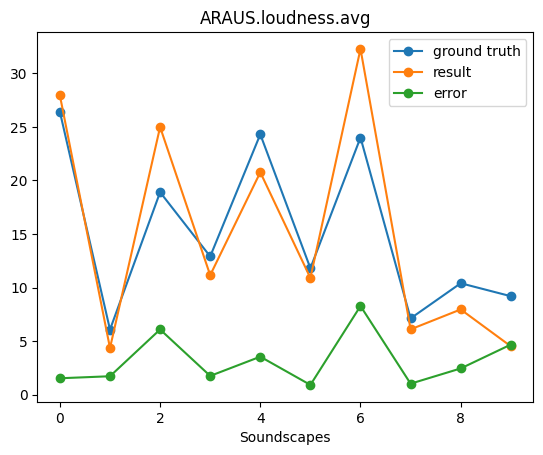

ARAUS.loudness.max


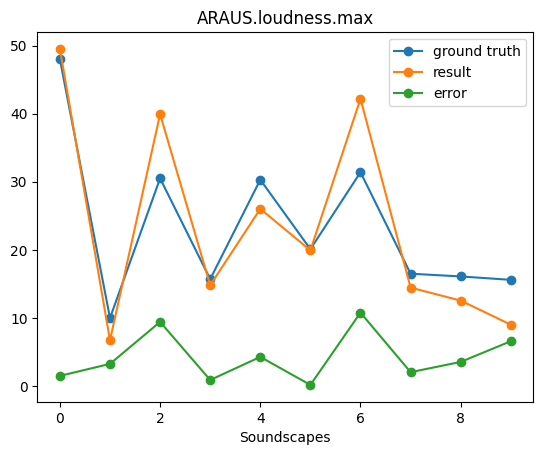

ARAUS.loudness.p05


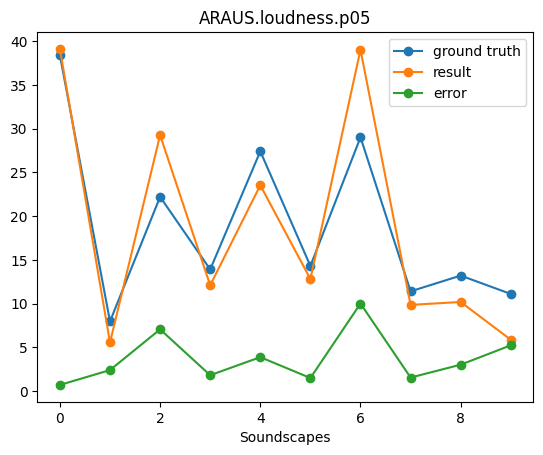

ARAUS.loudness.p10


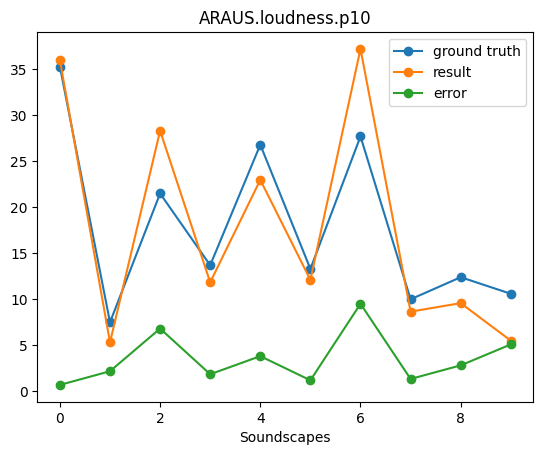

ARAUS.loudness.p20


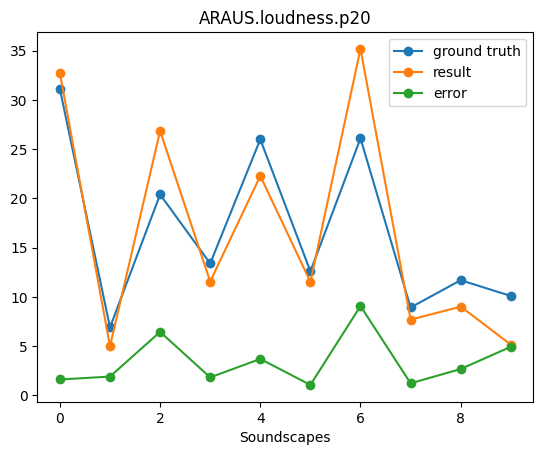

ARAUS.loudness.p30


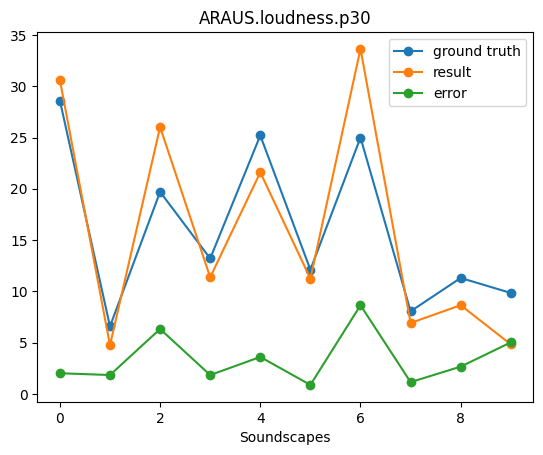

ARAUS.loudness.p40


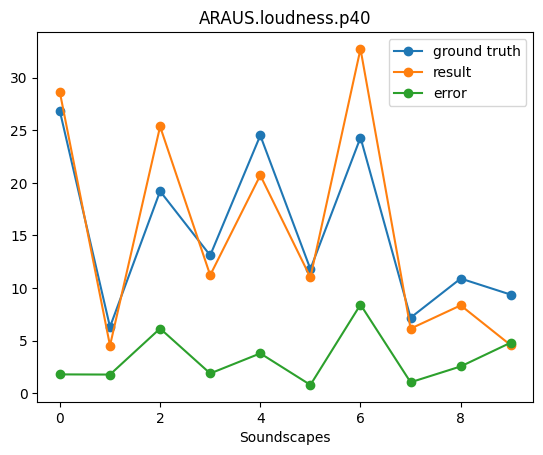

ARAUS.loudness.p50


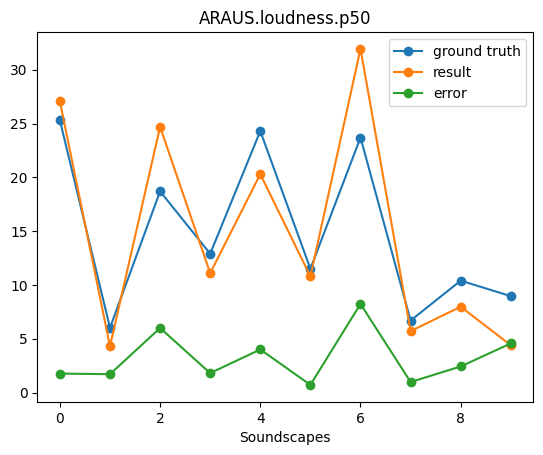

ARAUS.loudness.p60


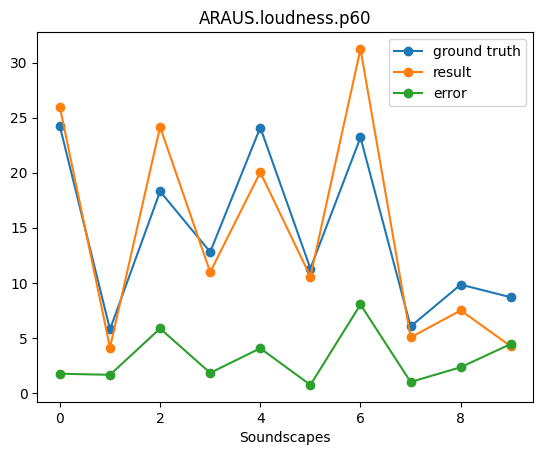

ARAUS.loudness.p70


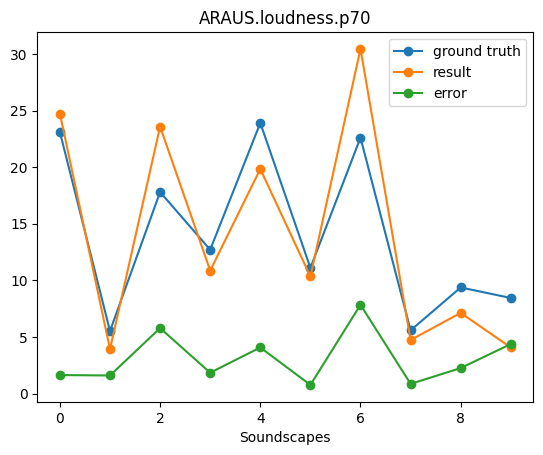

ARAUS.loudness.p80


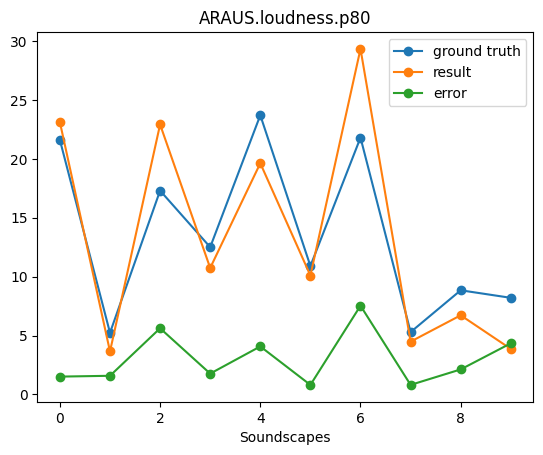

ARAUS.loudness.p90


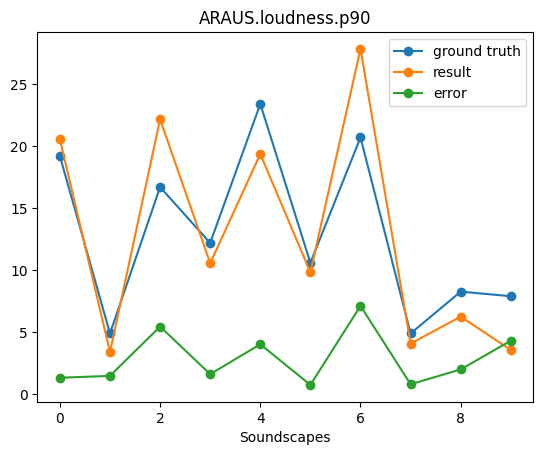

ARAUS.loudness.p95


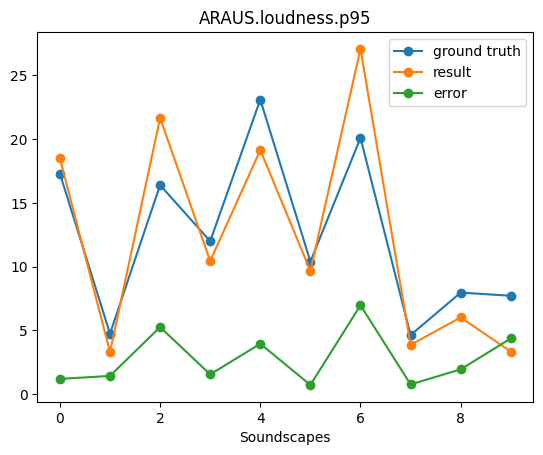

ARAUS.sharpness.avg


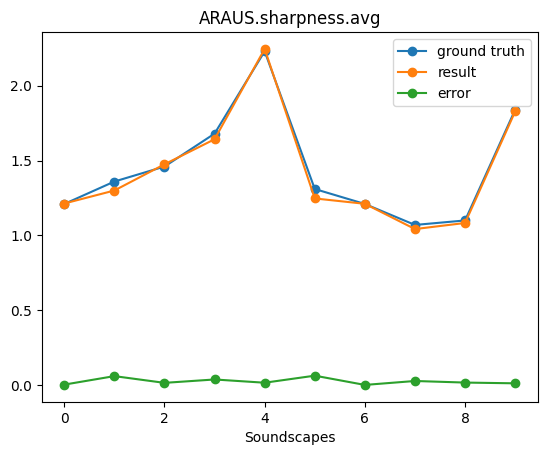

ARAUS.sharpness.max


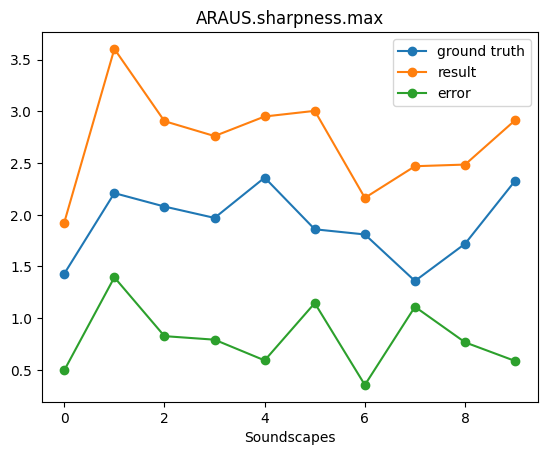

ARAUS.sharpness.p05


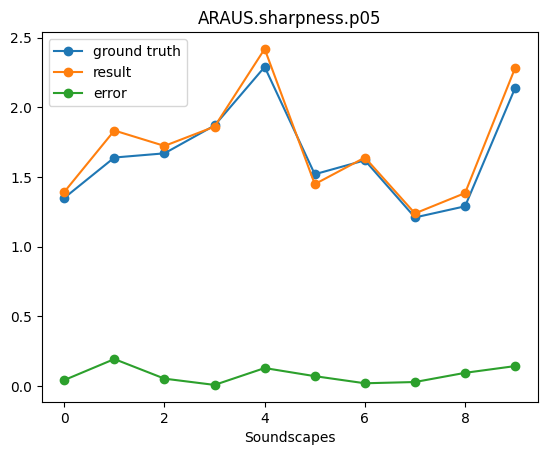

ARAUS.sharpness.p10


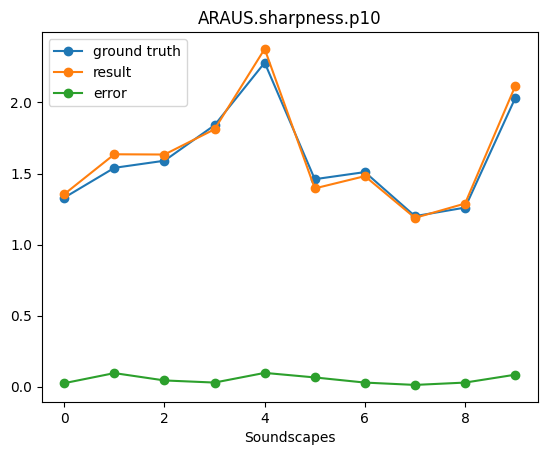

ARAUS.sharpness.p20


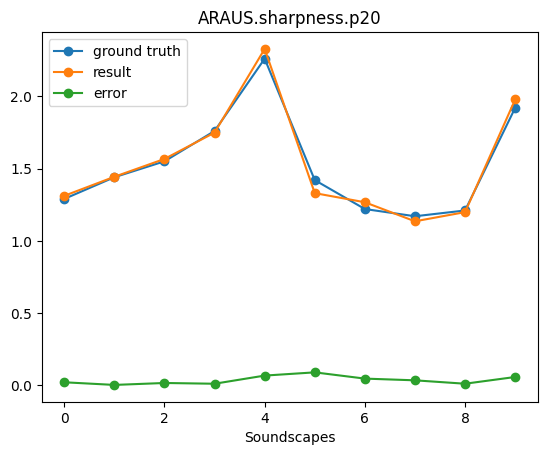

ARAUS.sharpness.p30


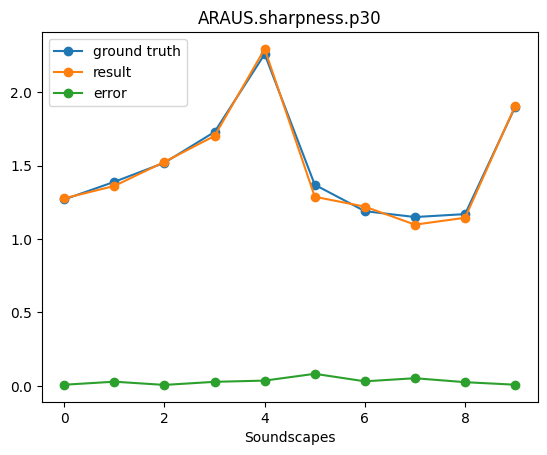

ARAUS.sharpness.p40


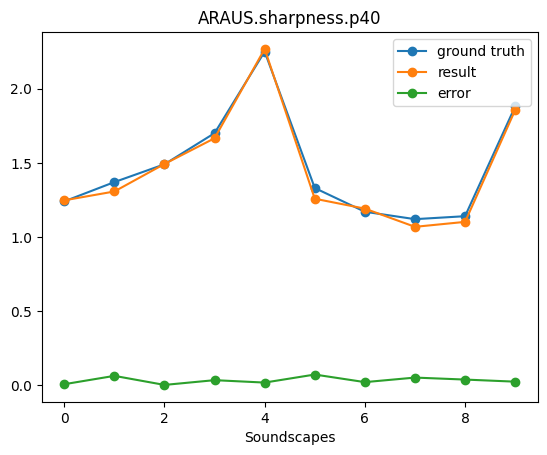

ARAUS.sharpness.p50


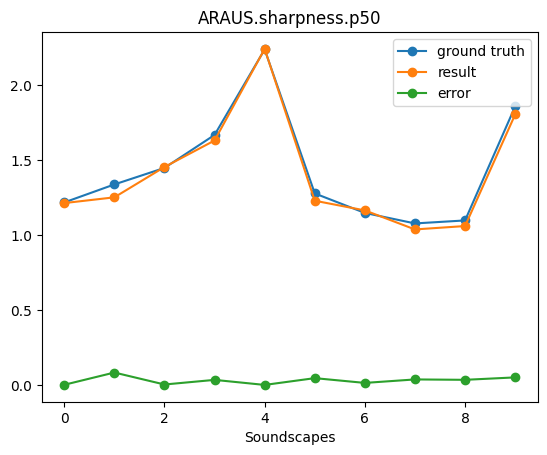

ARAUS.sharpness.p60


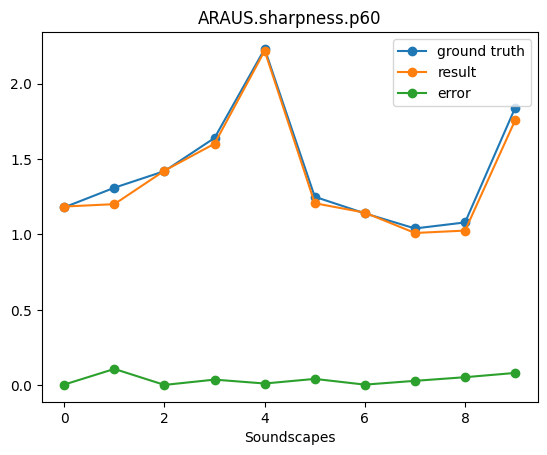

ARAUS.sharpness.p70


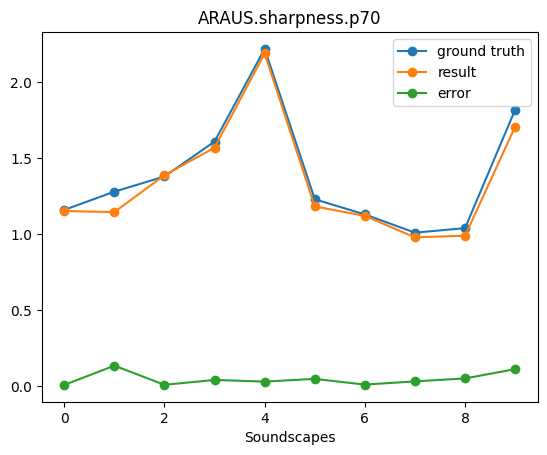

ARAUS.sharpness.p80


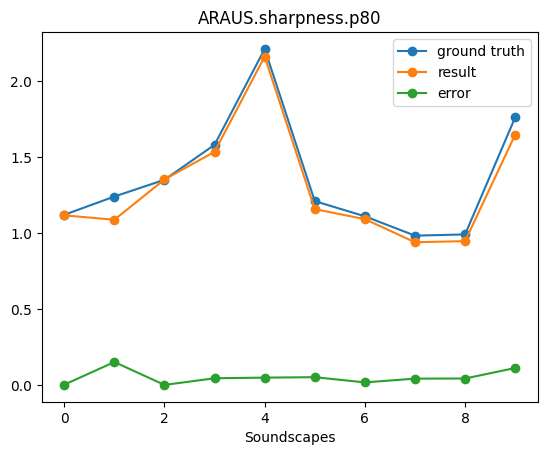

ARAUS.sharpness.p90


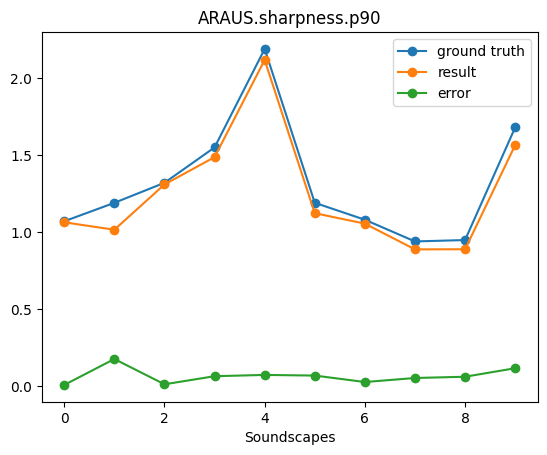

ARAUS.sharpness.p95


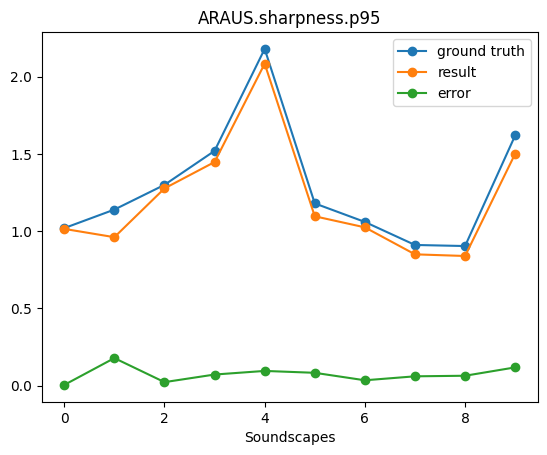

ARAUS.LA.avg


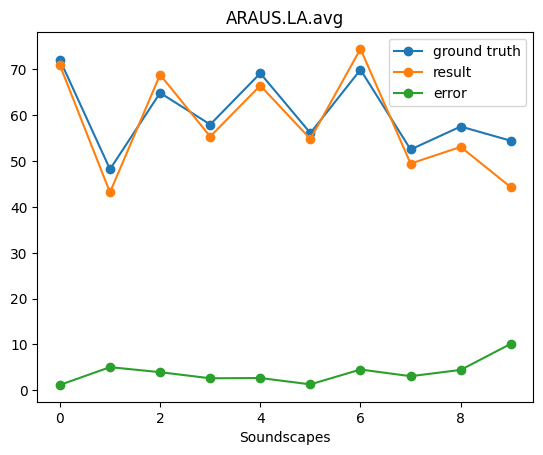

ARAUS.LA.min


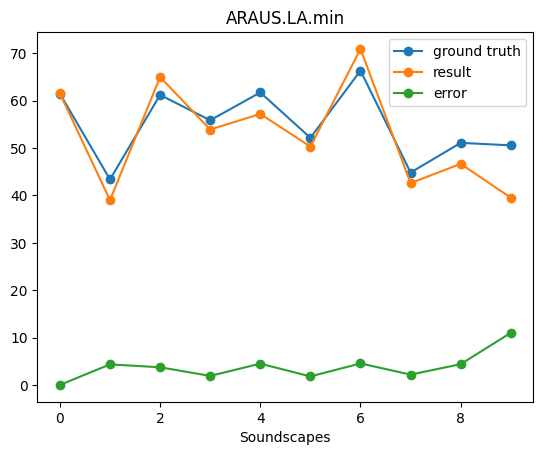

ARAUS.LA.max


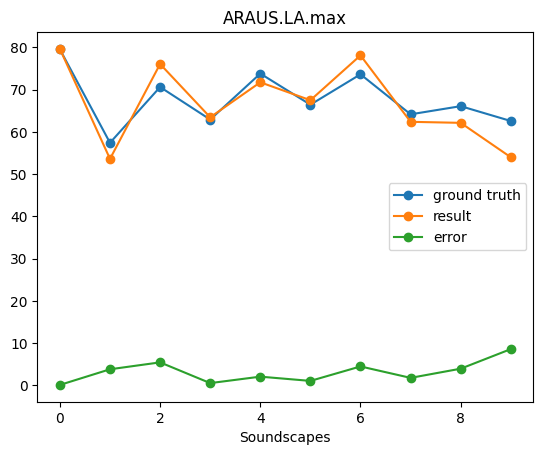

ARAUS.LA.p05


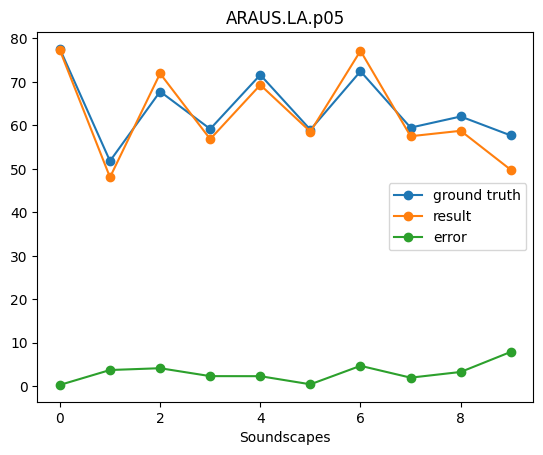

ARAUS.LA.p10


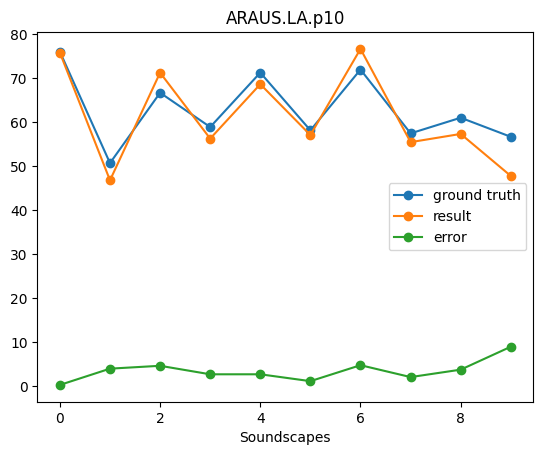

ARAUS.LA.p20


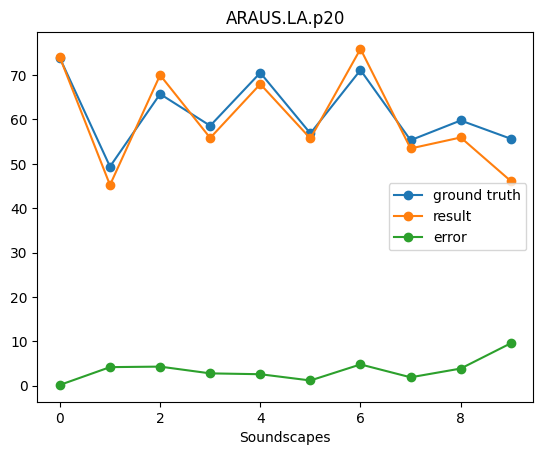

ARAUS.LA.p30


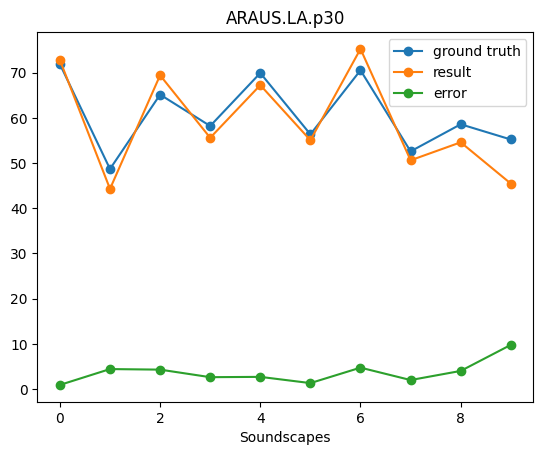

ARAUS.LA.p40


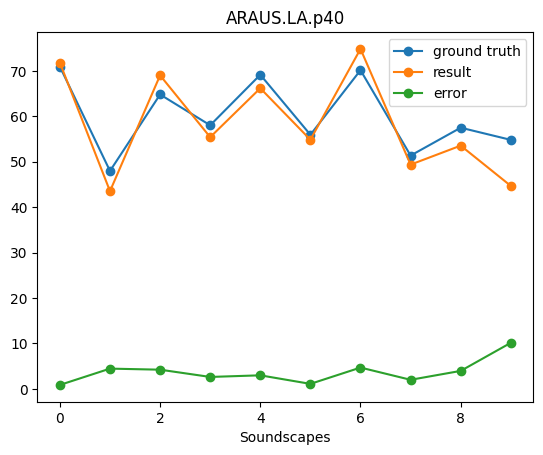

ARAUS.LA.p50


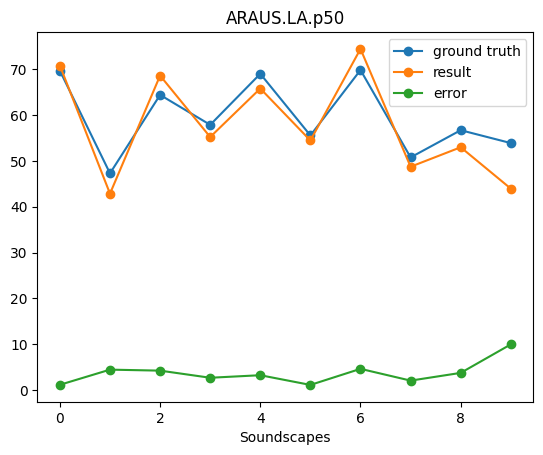

ARAUS.LA.p60


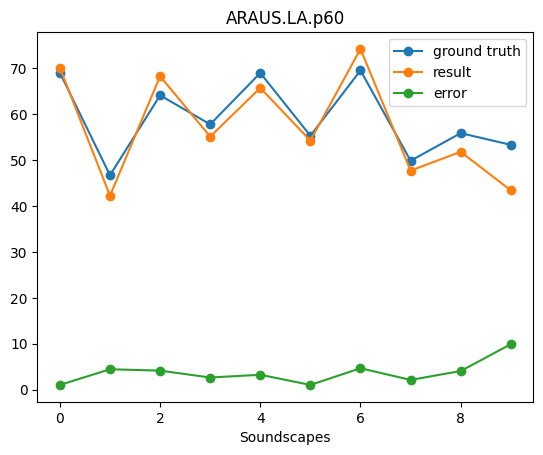

ARAUS.LA.p70


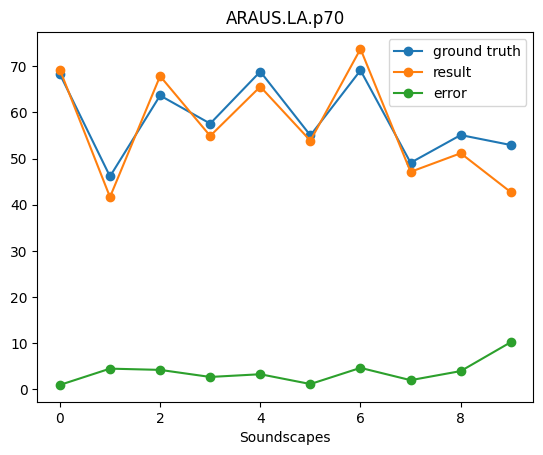

ARAUS.LA.p80


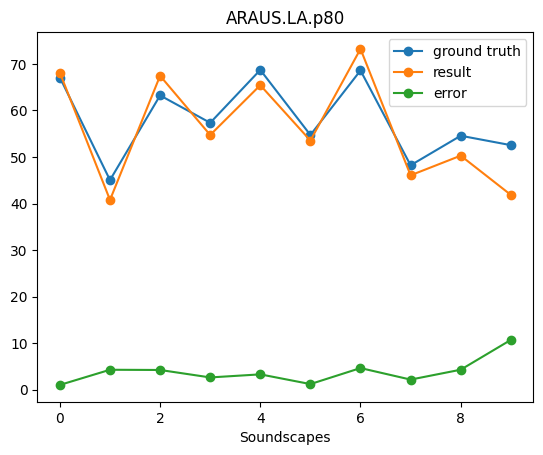

ARAUS.LA.p90


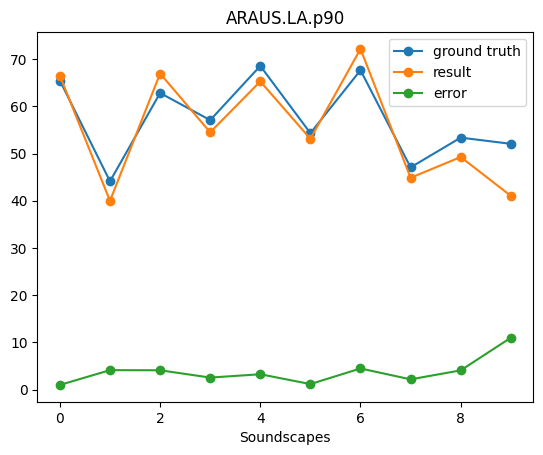

ARAUS.LA.p95


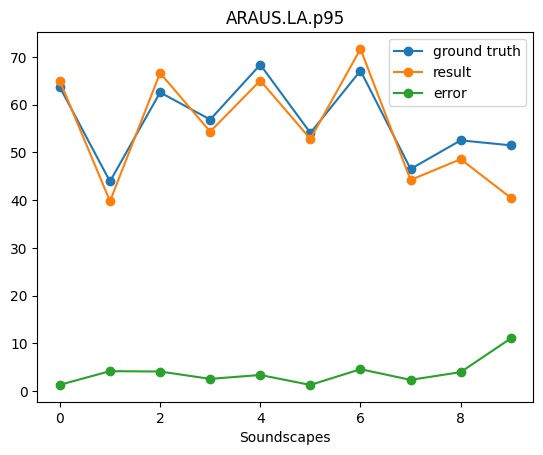

ARAUS.LC.avg


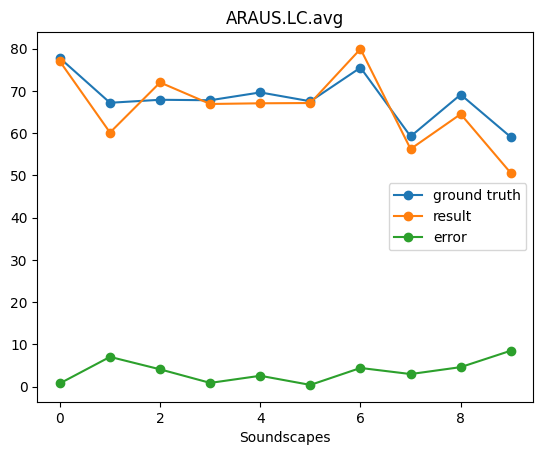

ARAUS.LC.min


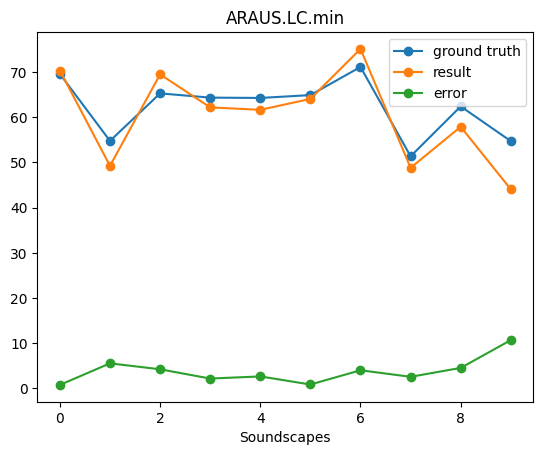

ARAUS.LC.max


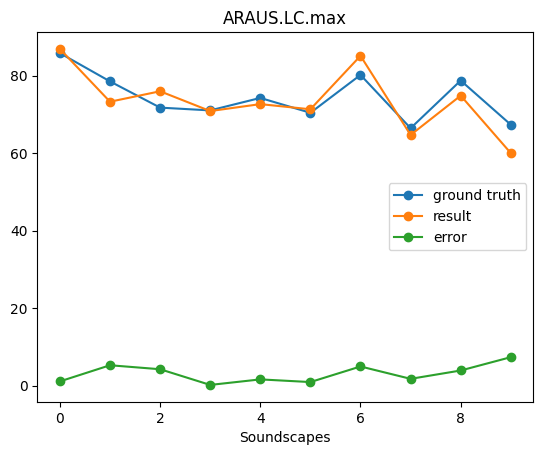

ARAUS.LC.p05


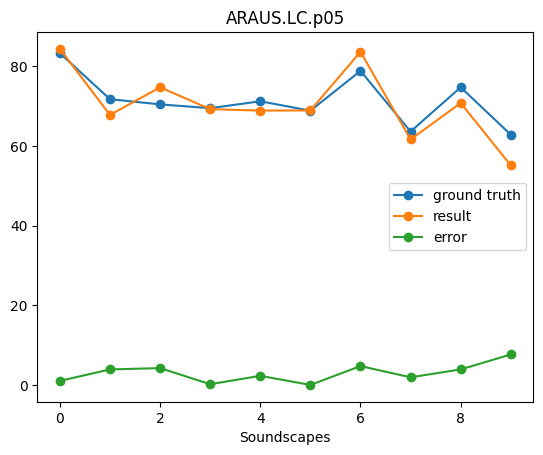

ARAUS.LC.p10


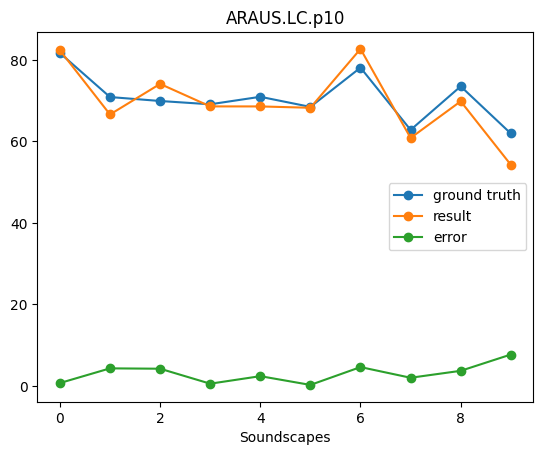

ARAUS.LC.p20


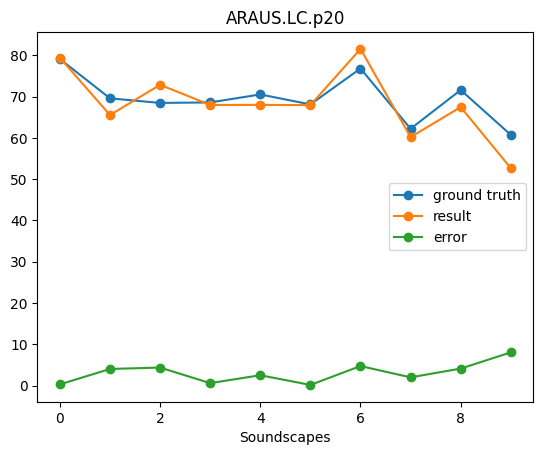

ARAUS.LC.p30


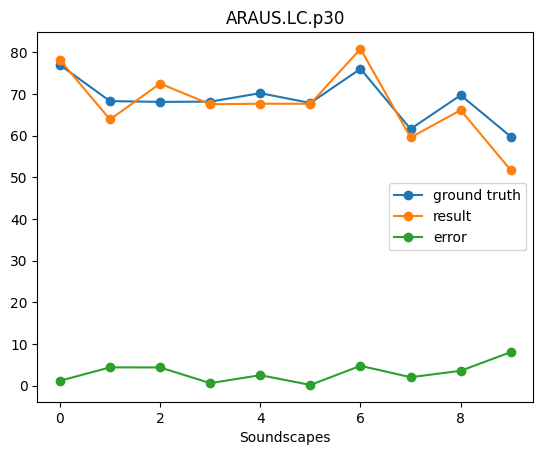

ARAUS.LC.p40


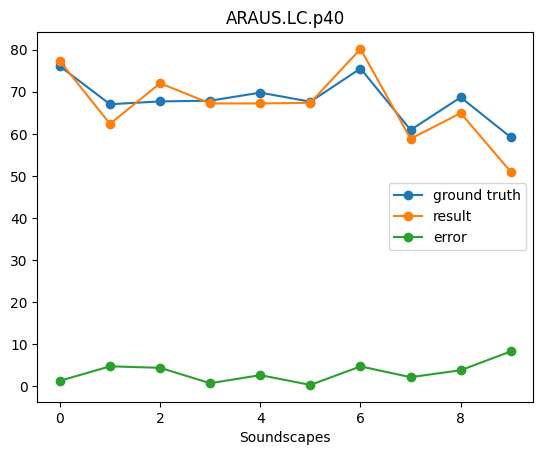

ARAUS.LC.p50


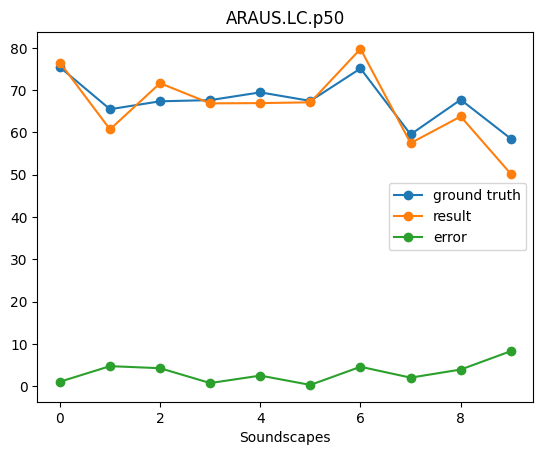

ARAUS.LC.p60


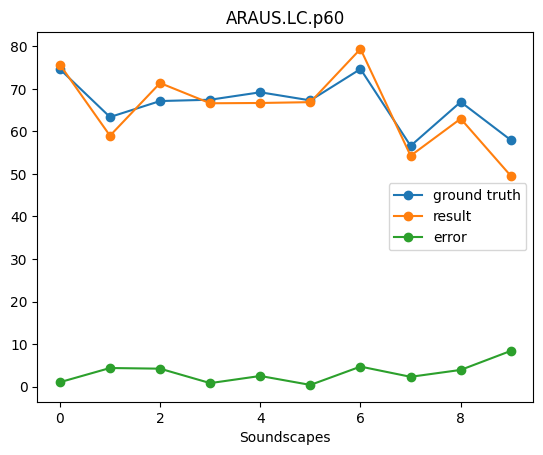

ARAUS.LC.p70


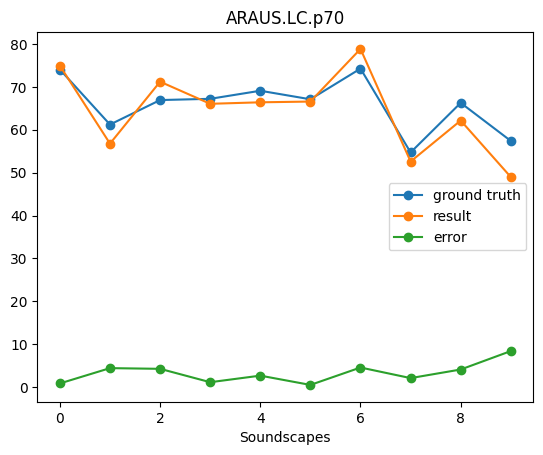

ARAUS.LC.p80


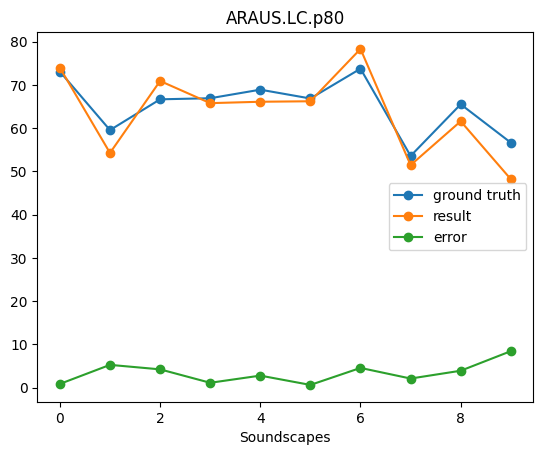

ARAUS.LC.p90


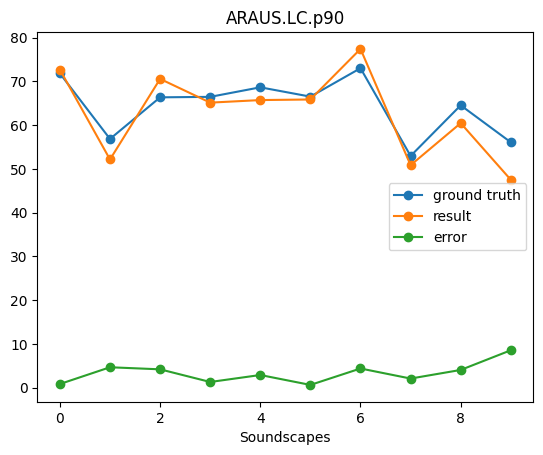

ARAUS.LC.p95


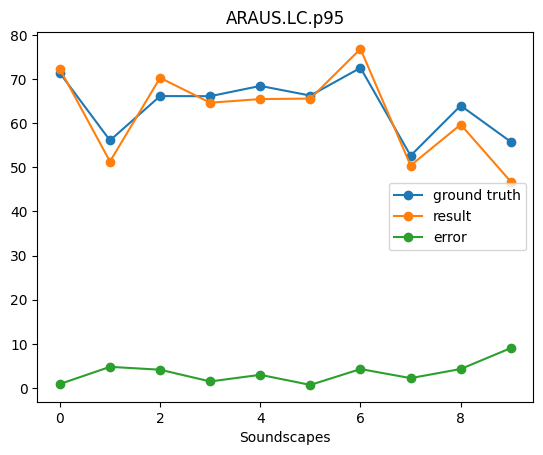

ARAUS.energy_frequency.00005_0


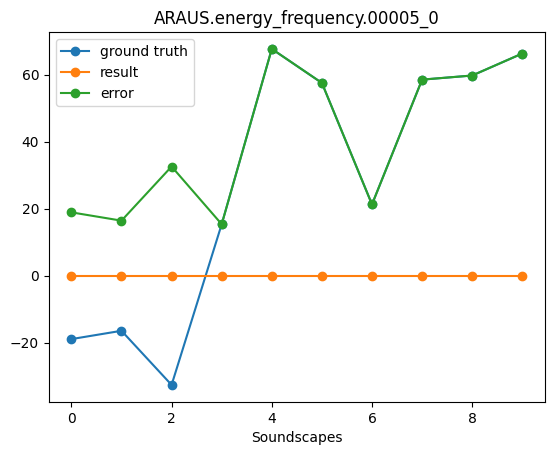

ARAUS.energy_frequency.00006_3


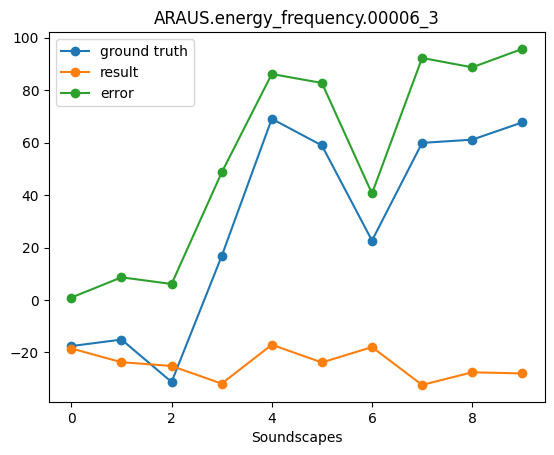

ARAUS.energy_frequency.00008_0


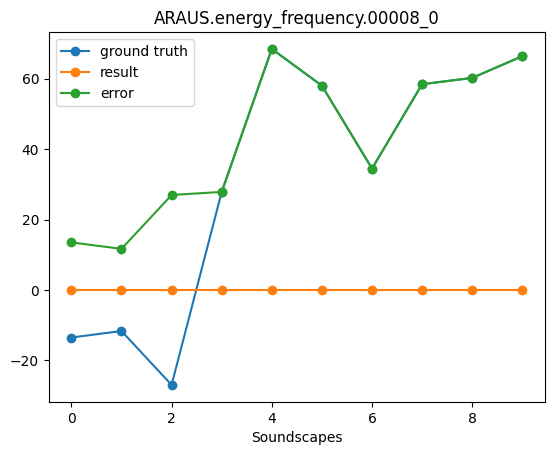

ARAUS.energy_frequency.00010_0


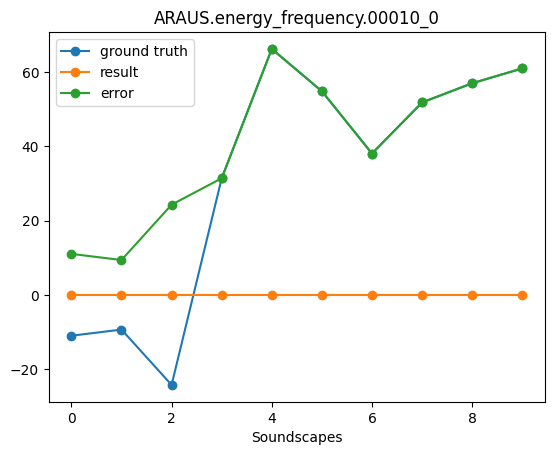

ARAUS.energy_frequency.00012_5


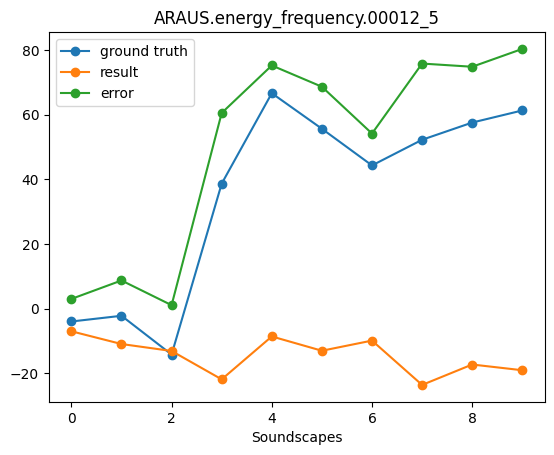

ARAUS.energy_frequency.00016_0


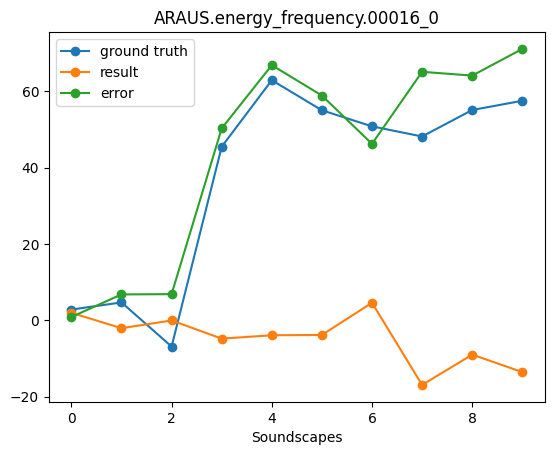

ARAUS.energy_frequency.00020_0


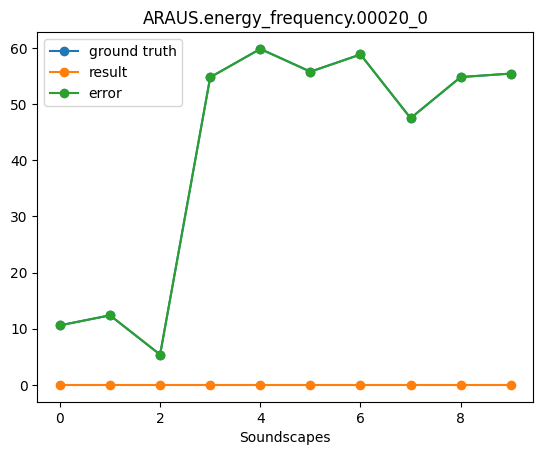

ARAUS.energy_frequency.00025_0


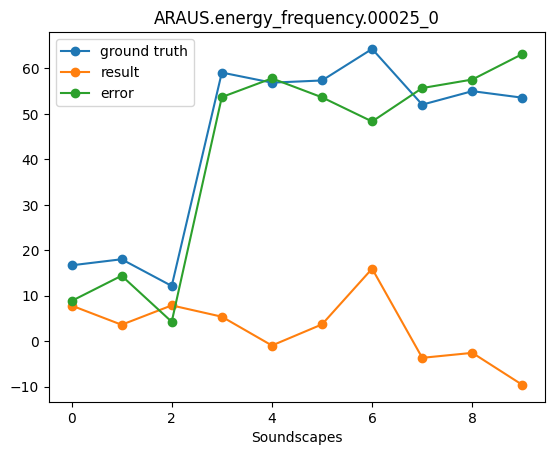

ARAUS.energy_frequency.00031_5


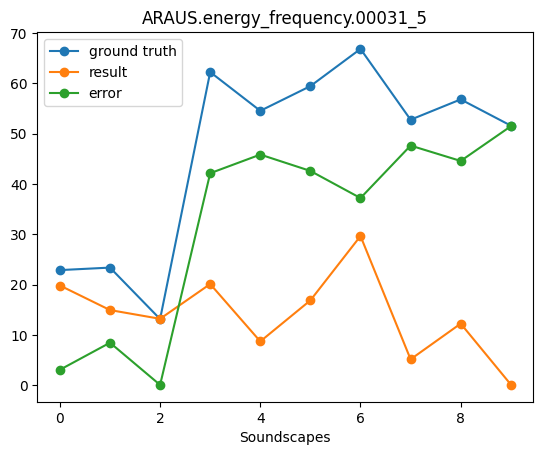

ARAUS.energy_frequency.00040_0


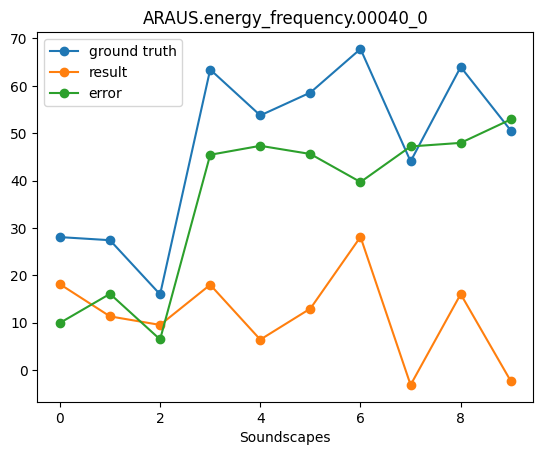

ARAUS.energy_frequency.00050_0


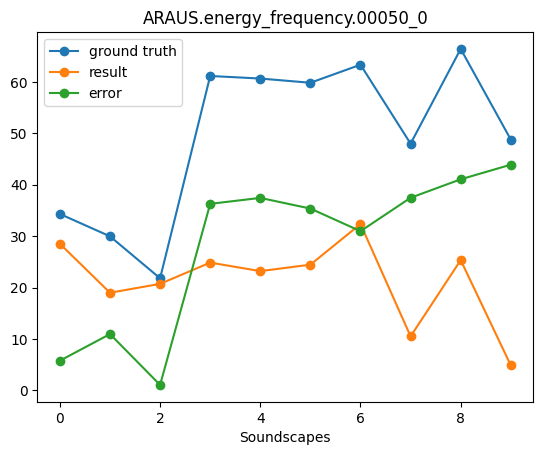

ARAUS.energy_frequency.00063_0


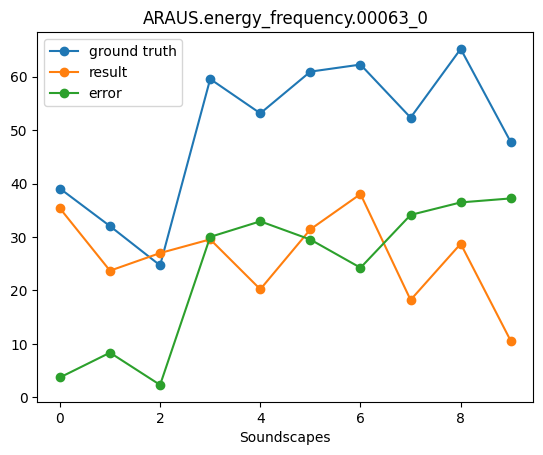

ARAUS.energy_frequency.00080_0


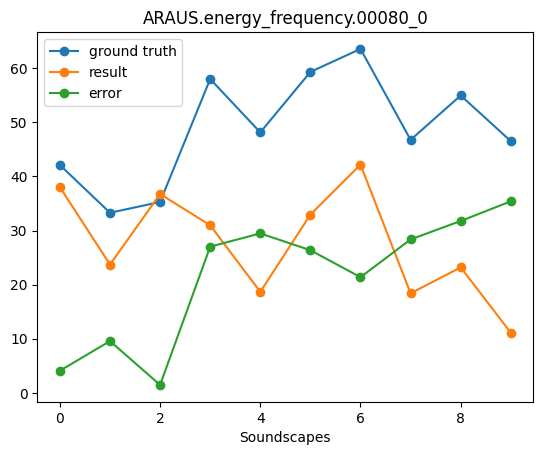

ARAUS.energy_frequency.00100_0


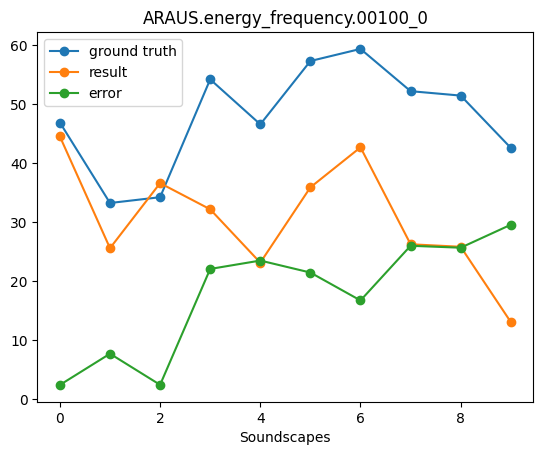

ARAUS.energy_frequency.00125_0


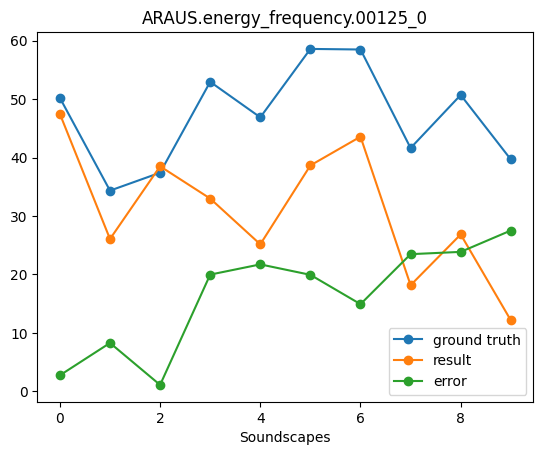

ARAUS.energy_frequency.00160_0


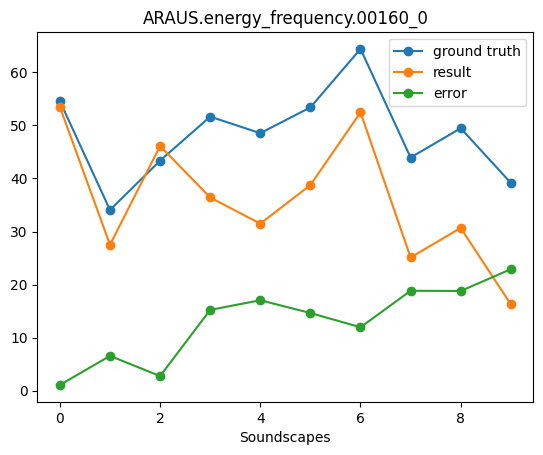

ARAUS.energy_frequency.00200_0


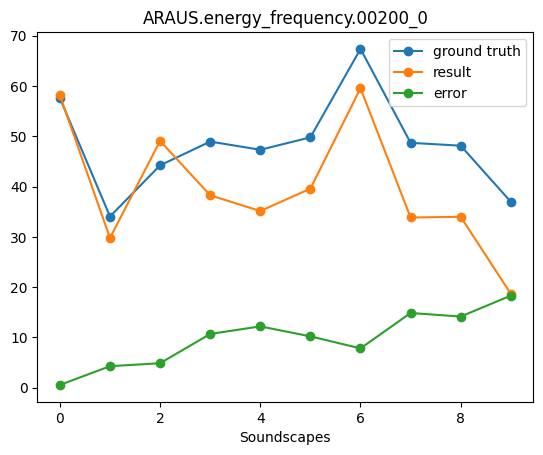

ARAUS.energy_frequency.00250_0


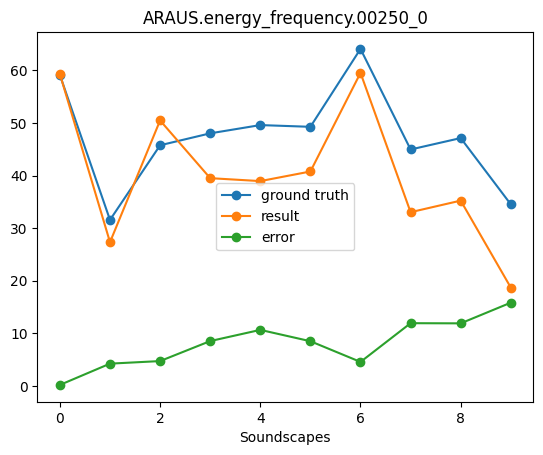

ARAUS.energy_frequency.00315_0


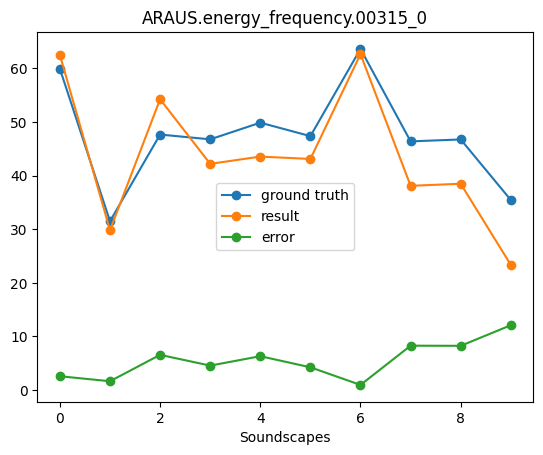

ARAUS.energy_frequency.00400_0


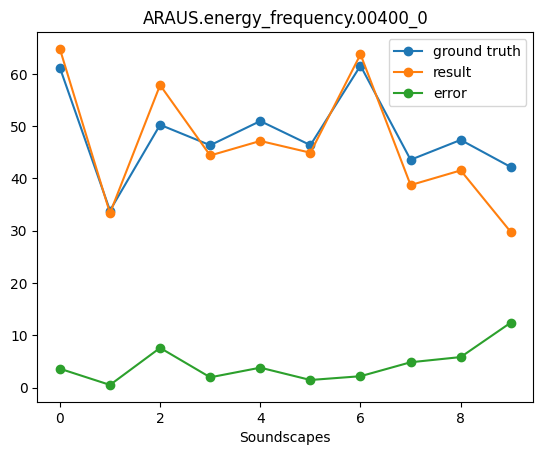

ARAUS.energy_frequency.00500_0


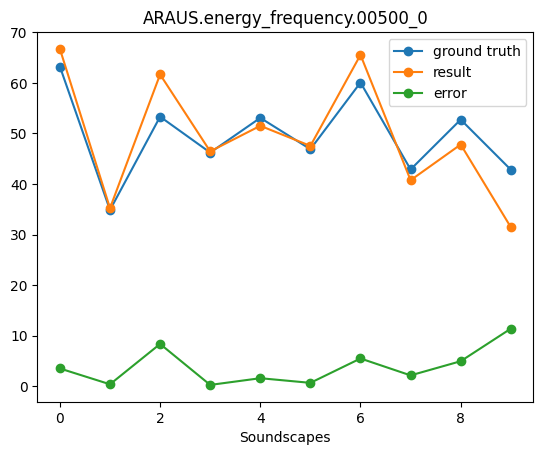

ARAUS.energy_frequency.00630_0


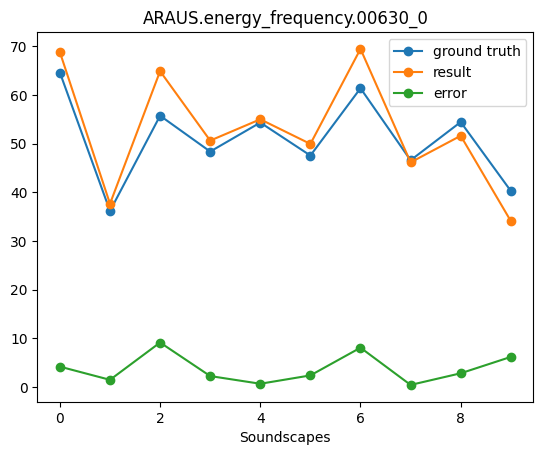

ARAUS.energy_frequency.00800_0


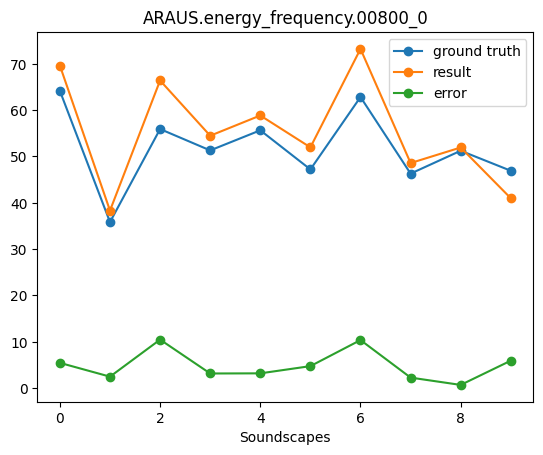

ARAUS.energy_frequency.01000_0


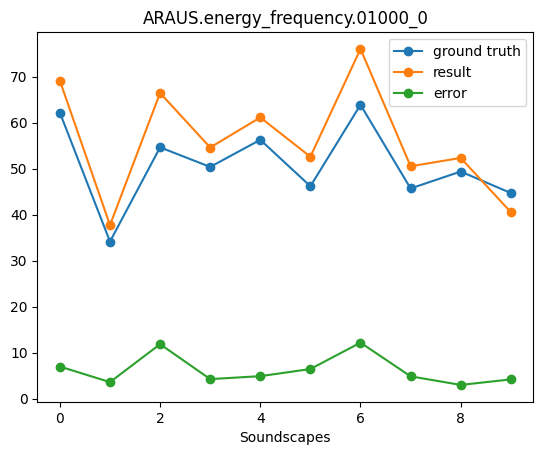

ARAUS.energy_frequency.01250_0


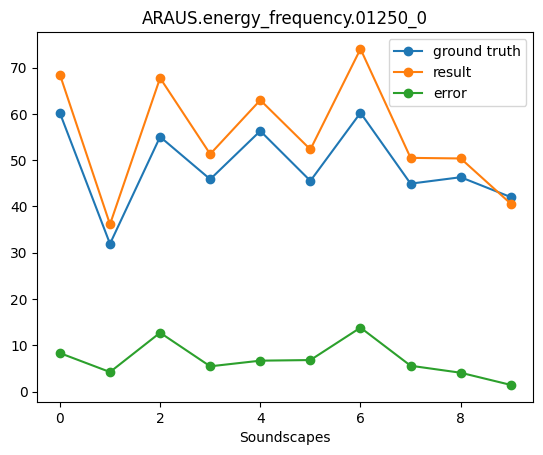

ARAUS.energy_frequency.01600_0


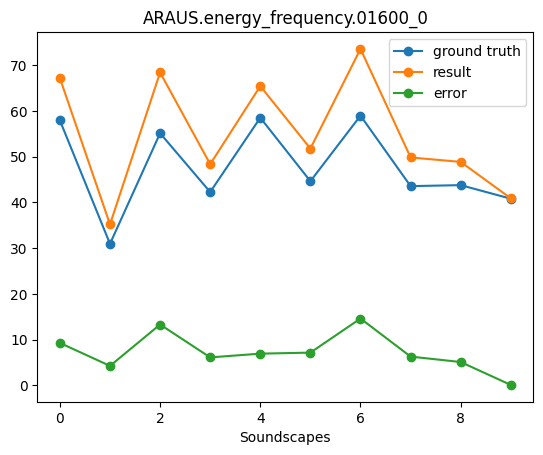

ARAUS.energy_frequency.02000_0


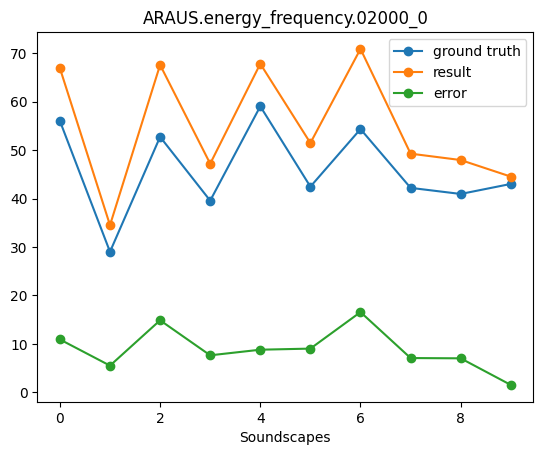

ARAUS.energy_frequency.02500_0


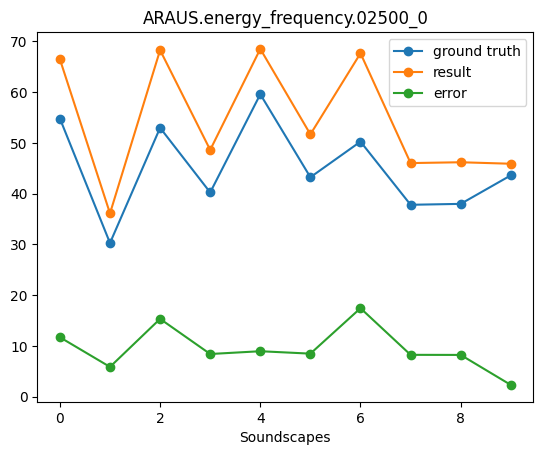

ARAUS.energy_frequency.03150_0


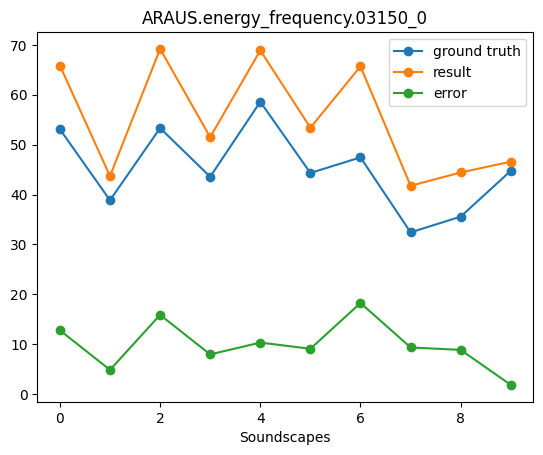

ARAUS.energy_frequency.04000_0


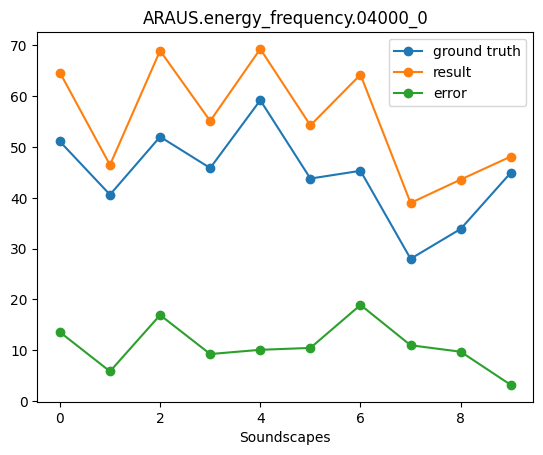

ARAUS.energy_frequency.05000_0


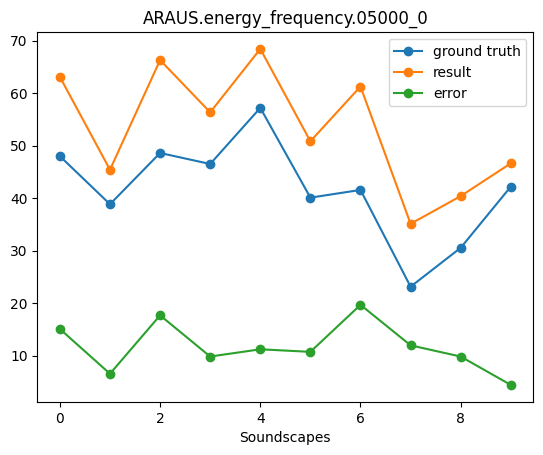

ARAUS.energy_frequency.06300_0


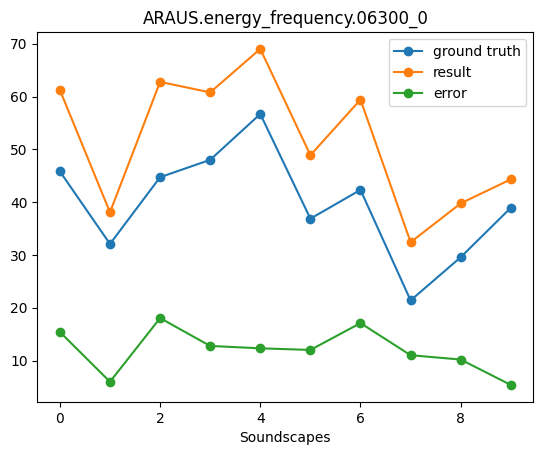

ARAUS.energy_frequency.08000_0


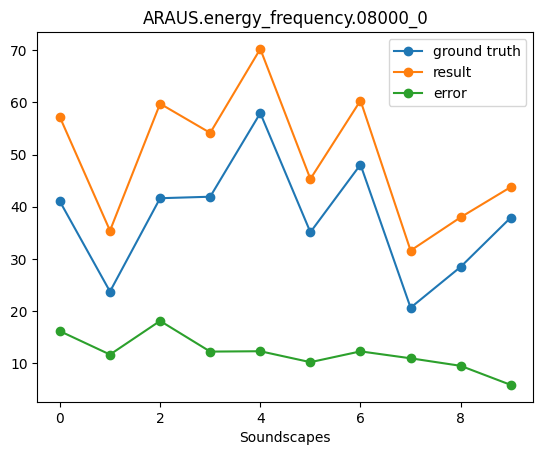

ARAUS.energy_frequency.10000_0


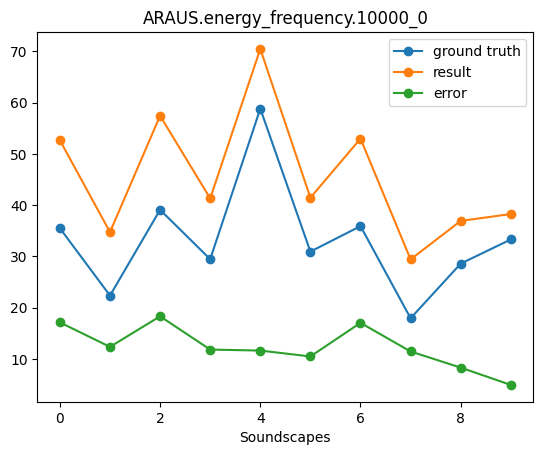

ARAUS.energy_frequency.12500_0


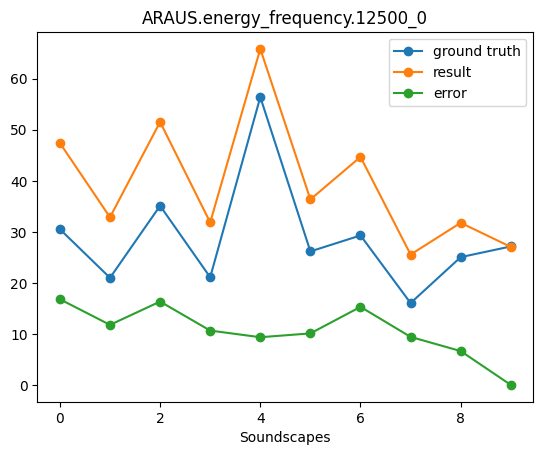

ARAUS.energy_frequency.16000_0


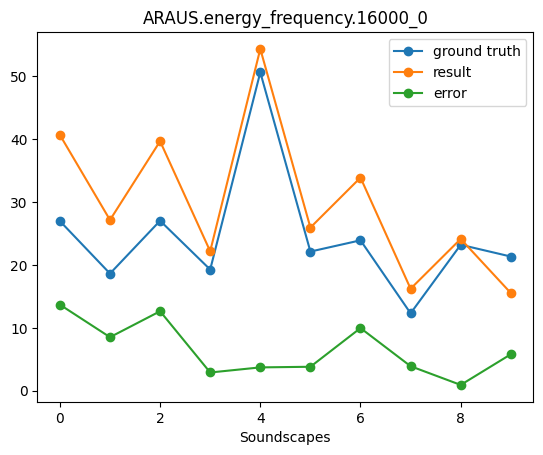

ARAUS.energy_frequency.20000_0


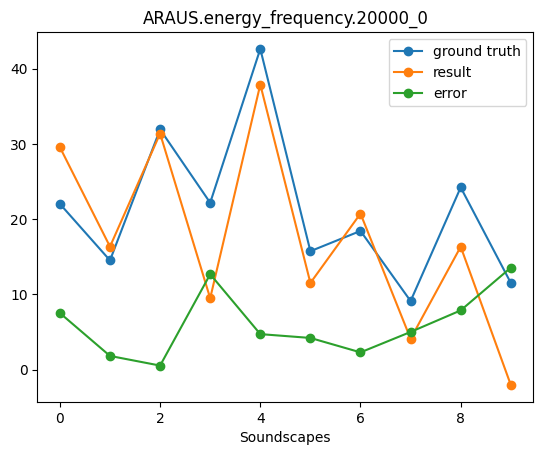

ARAUS.roughness.avg


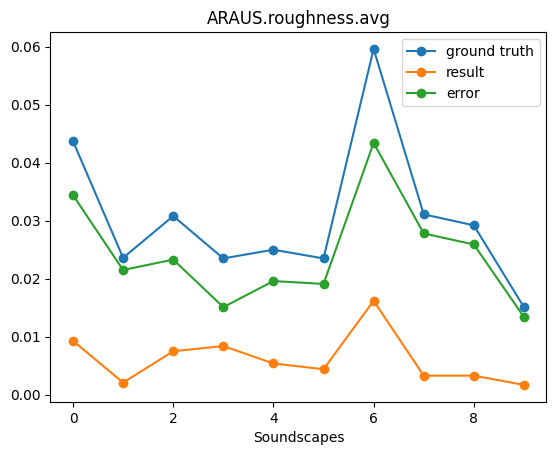

ARAUS.roughness.max


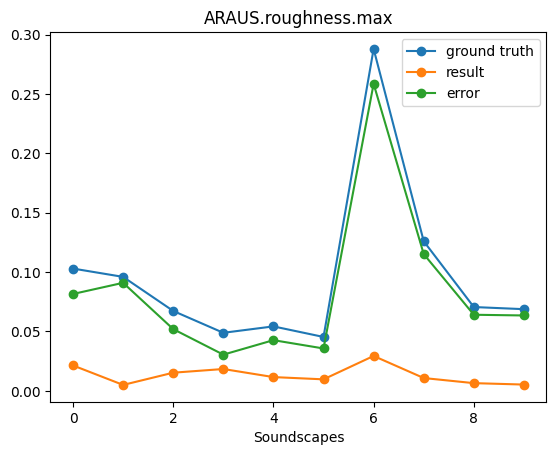

ARAUS.roughness.p05


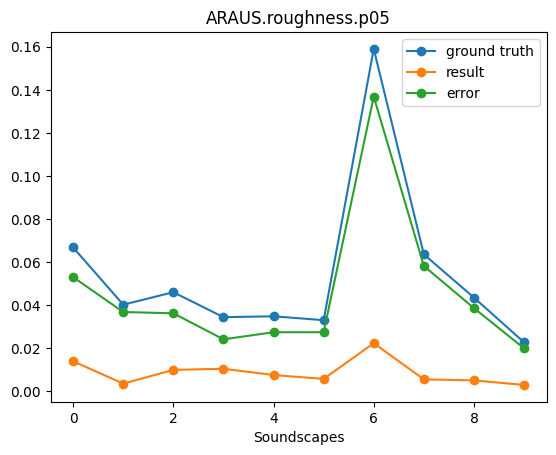

ARAUS.roughness.p10


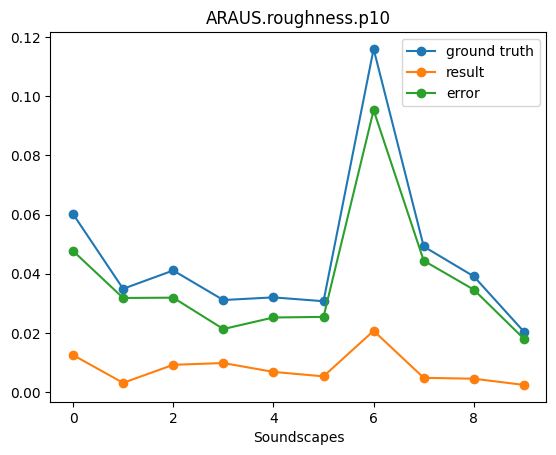

ARAUS.roughness.p20


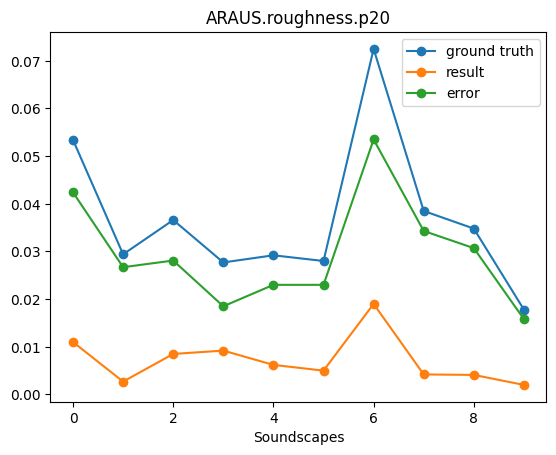

ARAUS.roughness.p30


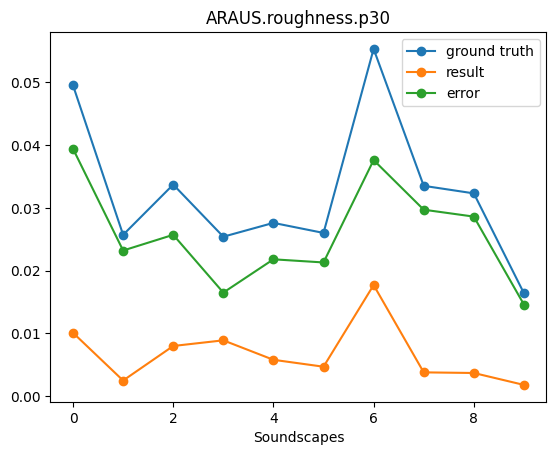

ARAUS.roughness.p40


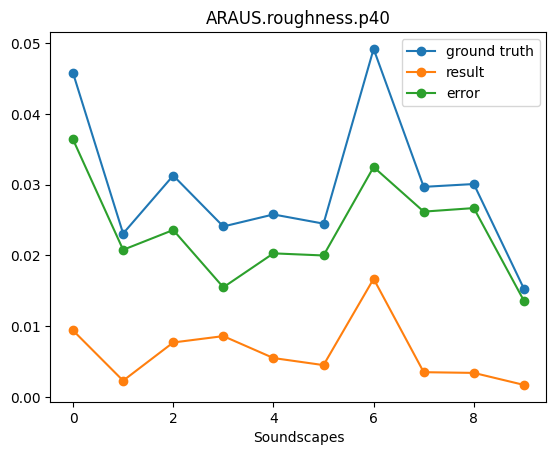

ARAUS.roughness.p50


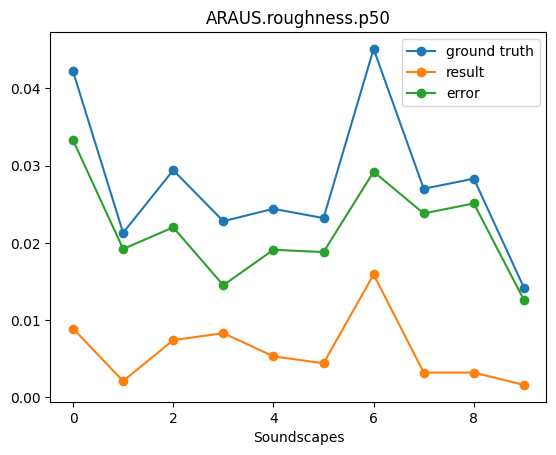

ARAUS.roughness.p60


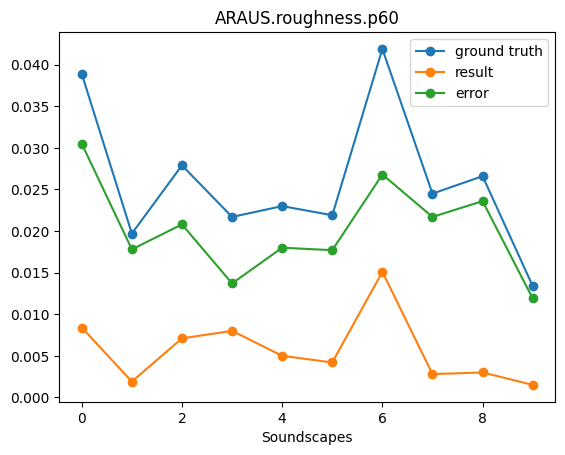

ARAUS.roughness.p70


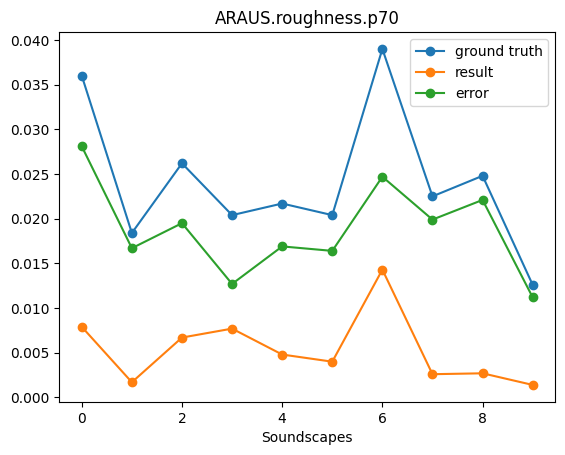

ARAUS.roughness.p80


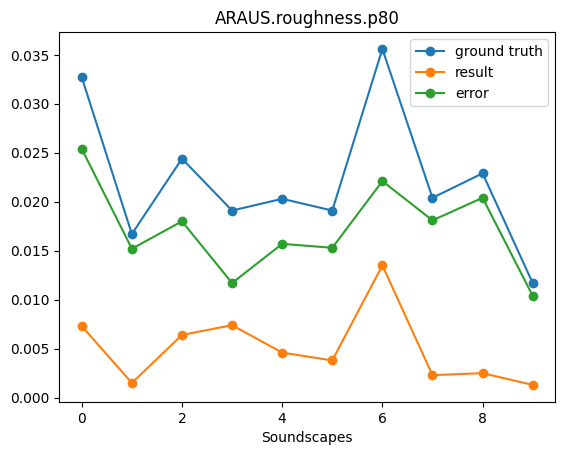

ARAUS.roughness.p90


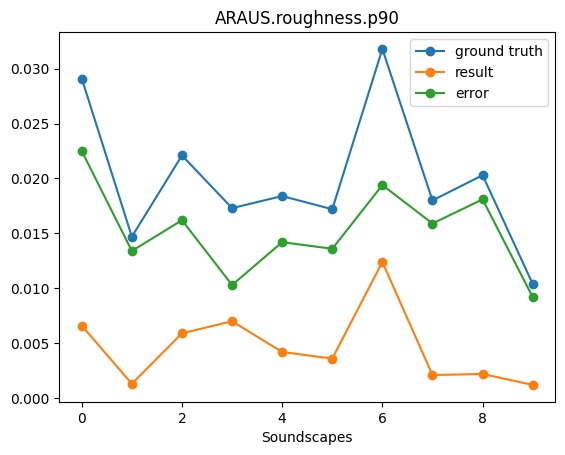

ARAUS.roughness.p95


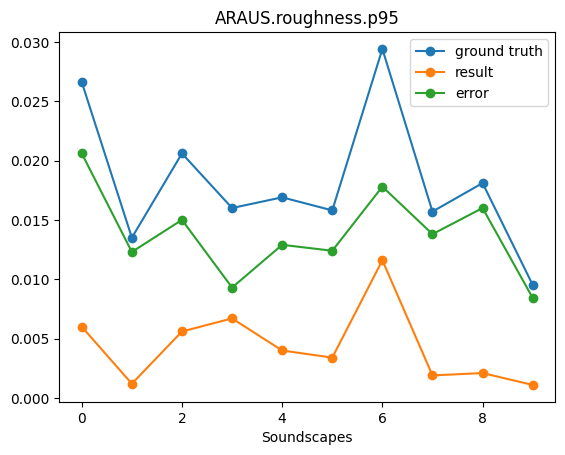

ARAUS.fluctuation.avg


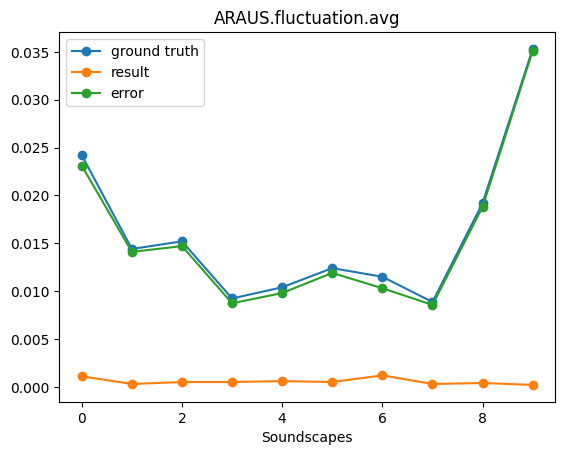

ARAUS.fluctuation.max


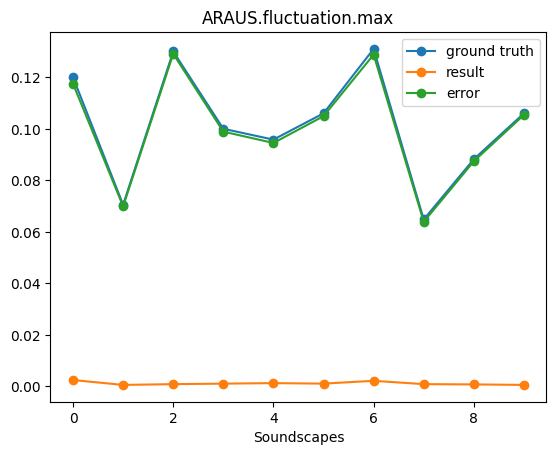

ARAUS.fluctuation.p05


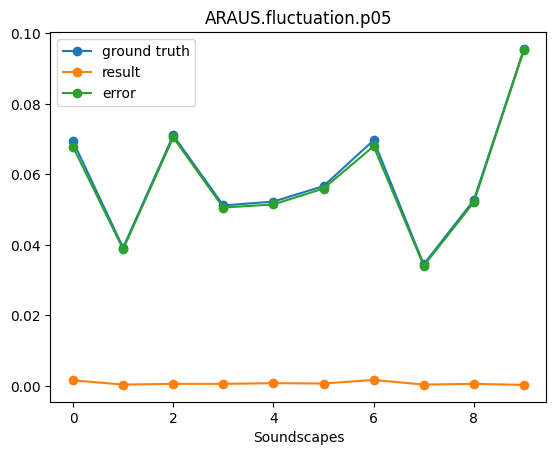

ARAUS.fluctuation.p10


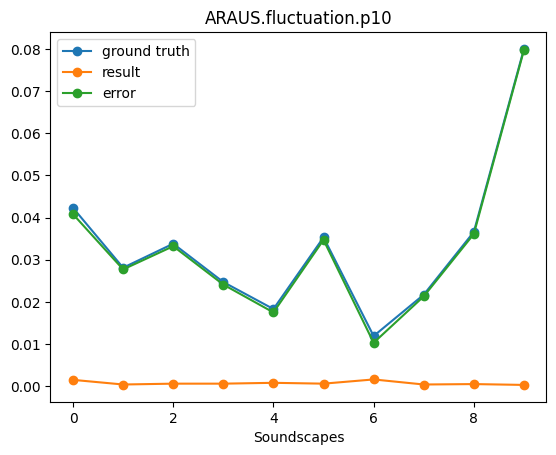

ARAUS.fluctuation.p20


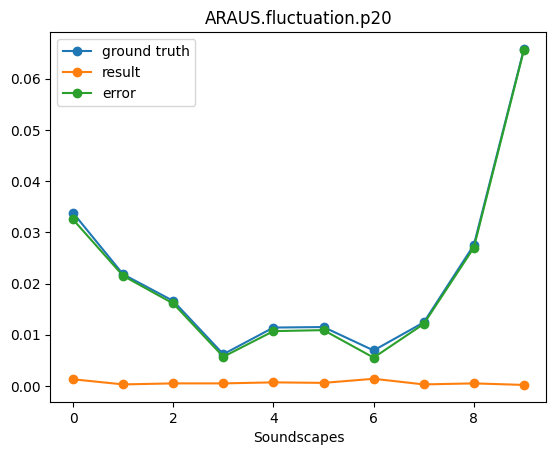

ARAUS.fluctuation.p30


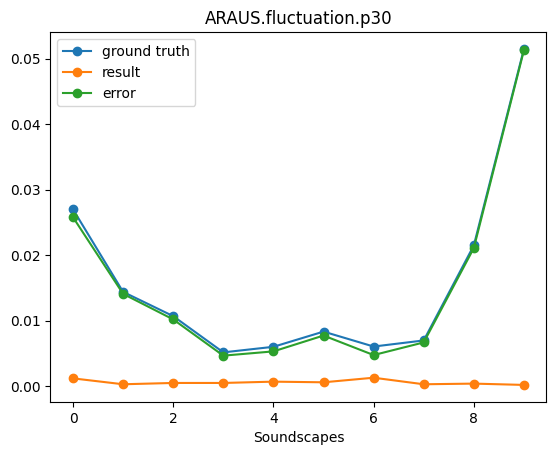

ARAUS.fluctuation.p40


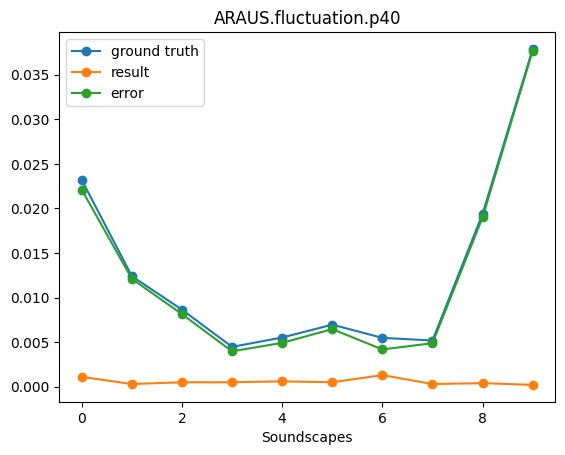

ARAUS.fluctuation.p50


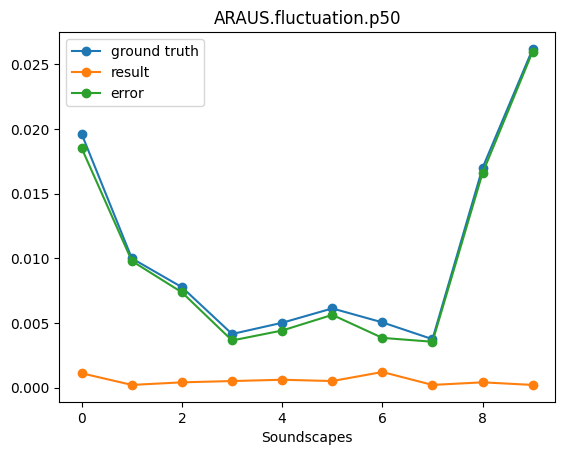

ARAUS.fluctuation.p60


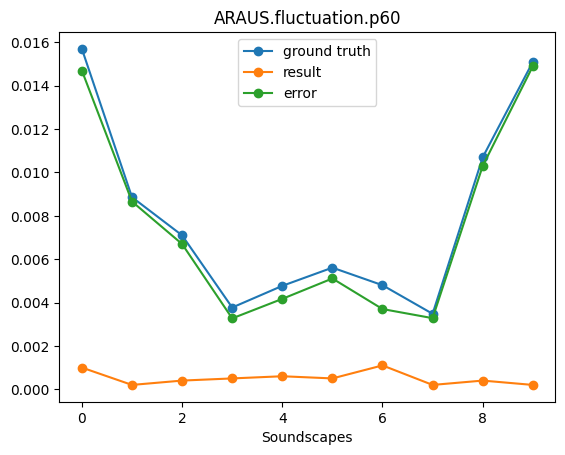

ARAUS.fluctuation.p70


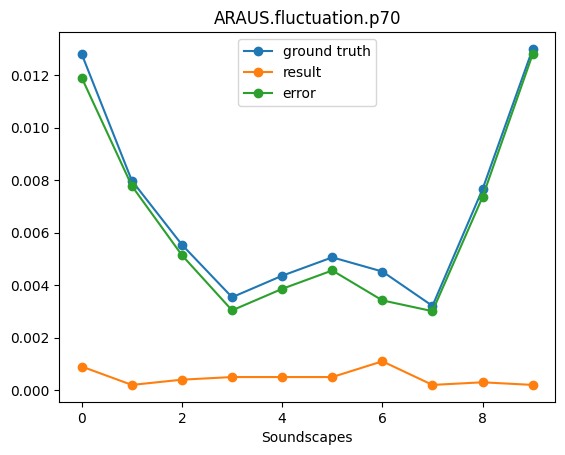

ARAUS.fluctuation.p80


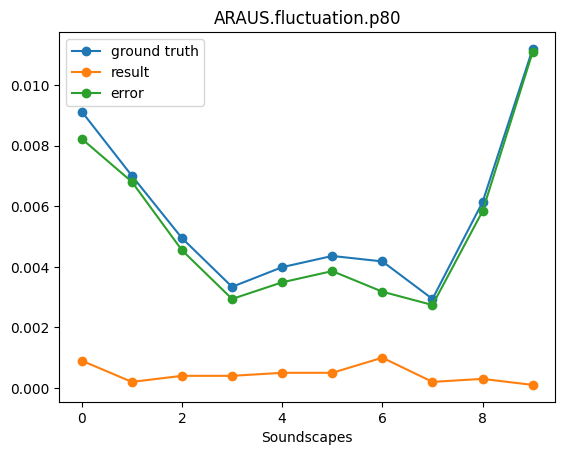

ARAUS.fluctuation.p90


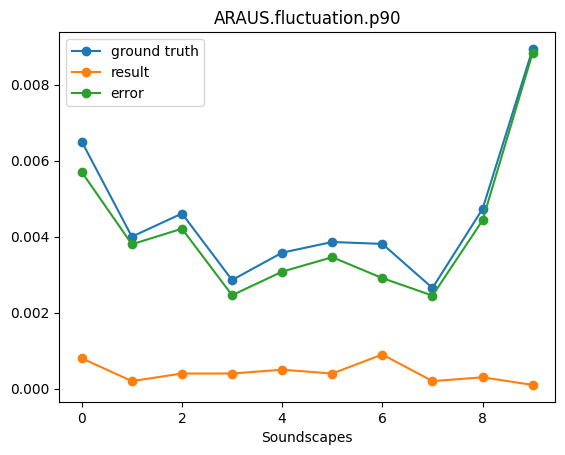

ARAUS.fluctuation.p95


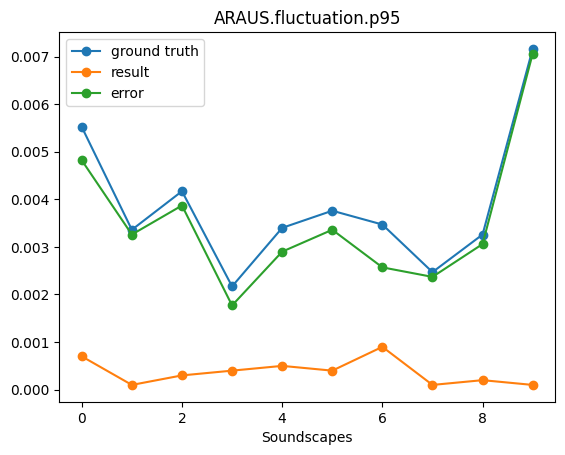

In [70]:
for f in features:
    print(f)        
    plt.plot(output_ARAUS[f], "o-", label="ground truth")
    plt.plot(output_generated[f], "o-", label="result")
    error=np.abs(output_ARAUS[f]-output_generated[f])
    plt.plot(error, "o-", label="error")
    plt.xlabel('Soundscapes')
    plt.title(f)
    plt.legend()
    plt.show() 